# Maximum Liklihood Estimation

The MLE method has been used here in order to find the best fit dose-response curves for either the total group or for separate fractionation groups. 
Clinical outcome data analysis includes a total of 38 cohorts (2,701 patients), 10 of which used conventional fractionation radiation therapy (1.8-3 Gy/fx), 22 which used SBRT with several fractions (3-10 fxs), and 6 cohorts of single-fraction SBRT. 

Each cohort of patients provides detailed information on the treatment and outcome, including the number of patients, total dose, fractional dose, number of fractions, treatment schedule, dose prescription method, and local control rate.
When separate outcomes were available for different fractionation schemes, the patient cohort was divided into separate cohorts.

- Jeong, J., K. I. Shoghi, and J. O. Deasy. "Modelling the interplay between hypoxia and proliferation in radiotherapy tumour response." Physics in Medicine & Biology 58.14 (2013): 4897-4919.

In [1]:
import numpy as np

# input data for each cohort
cohort = [[[0 for _ in range(4)] for _ in range(12)] for _ in range(47)]
a = 0.5

# cohort 1 (Hayakawa 1999)
cohort[0][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[0][1][0] = 36  # # patients
cohort[0][2][0] = 67  # total dose (Gy)
cohort[0][3][0] = [2]  # fraction size (Gy)
cohort[0][4][0] = [0]  # fraction schedule
cohort[0][5][0] = 0.806  # local control rate
cohort[0][6][0] = 2 #fraction size

# modified the total dose (from 60 to 63.2) and local control rate (from 0.566 to 0.585) cohort 2 (Kaskowitz 1993)
cohort[1][0][0] = 1 # 1=conv,2=SBRT,3=single fx
cohort[1][1][0] = 53  # patients
cohort[1][2][0] = 63.2  #total dose (Gy)
cohort[1][3][0] = [2] # fraction size (Gy)
cohort[1][4][0] = [0] # fraction schedule
cohort[1][5][0] = 0.585 # local control rate
cohort[1][6][0] = 2  #fraction size

# Excluded due to larger fraction size (4 Gy/fx)
# cohort 3 (Slotman 1996)
cohort[2][0][0] = 4 # 1=conv,2=SBRT,3=single fx
cohort[2][1][0] = 31 # patients
cohort[2][2][0] = 48 # total dose (Gy)
cohort[2][3][0] = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4] # fraction size (Gy)
cohort[2][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16] # fraction schedule
cohort[2][5][0] = 0.936 # local control rate
cohort[2][6][0] = 4 

#cohort 4 (Sandler 1990)
cohort[3][0][0]=1 # 1=conv,2=SBRT,3=single fx
cohort[3][1][0]=77 # # patients
cohort[3][2][0]=60 # total dose (Gy)
cohort[3][3][0]=[2] # fraction size (Gy)
cohort[3][4][0]=[0] # fraction schedule
cohort[3][5][0]=0.572 # local control rate
cohort[3][6][0]=2

# Excluded due to small patient number (n=11)
# cohort 5 (Haffty 1988, cont)
cohort[4][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[4][1][0] = 11  # # patients
cohort[4][2][0] = 59  # total dose (Gy)
cohort[4][3][0] = [2]  # fraction size (Gy)
cohort[4][4][0] = [0]  # fraction schedule
cohort[4][5][0] = 0.818  # local control rate
cohort[4][6][0] = 2

# Excluded due to split course
# cohort 6 (Haffty 1988, split)
cohort[5][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[5][1][0] = 32  # # patients
cohort[5][2][0] = 54  # total dose (Gy)
cohort[5][3][0] = [2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75]  # fraction size (Gy)
cohort[5][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40]  # fraction schedule
cohort[5][5][0] = 0.531  # local control rate
cohort[5][6][0] = 2.75


# Excluded due to split course
# cohort 7 (Noordijk 1988)
cohort[6][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[6][1][0] = 50  # # patients
cohort[6][2][0] = 60  # total dose (Gy)
cohort[6][3][0] = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]  # fraction size (Gy)
cohort[6][4][0] = [1, 2, 4, 5, 8, 9, 11, 12, 15, 16, 32, 33, 36, 37, 39, 40, 43, 44, 46, 47]  # fraction schedule
cohort[6][5][0] = 0.300  # local control rate
cohort[6][6][0] = 3

# cohort 8 (Morita 1997)
cohort[7][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[7][1][0] = 149  # # patients
cohort[7][2][0] = 64.7  # total dose (Gy)
cohort[7][3][0] = [2]  # fraction size (Gy)
cohort[7][4][0] = [0]  # fraction schedule
cohort[7][5][0] = 0.557  # local control rate
cohort[7][6][0] = 2

# cohort 9 (Cheung 2000)
cohort[8][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[8][1][0] = 102  # # patients
cohort[8][2][0] = 52.5  # total dose (Gy)
cohort[8][3][0] = [2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.625]     # fraction size (Gy)
cohort[8][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26]  # fraction schedule
cohort[8][5][0] = 0.590  # local control rate
cohort[8][6][0] = 2.625

# Excluded due to larger  fraction size (4 Gy/fx)
# cohort 10 (Cheung 2002)
cohort[9][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[9][1][0] = 33  # # patients
cohort[9][2][0] = 48  # total dose (Gy)
cohort[9][3][0] = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]  # fraction size (Gy)
cohort[9][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16]  # fraction schedule
cohort[9][5][0] = 0.706  # local control rate
cohort[9][6][0] = 4

# cohort 11 (Yu 2008)
cohort[10][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[10][1][0] = 80  # # patients
cohort[10][2][0] = 66.6  # total dose (Gy)
cohort[10][3][0] = [1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8,
                    1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8]# fraction size (Gy)
cohort[10][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26,
                   29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 51]  # fraction schedule
cohort[10][5][0] = 0.342  # local control rate
cohort[10][6][0] = 1.8

# cohort 12 (Narayan 2004)
cohort[11][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[11][1][0] = 18  # # patients
cohort[11][2][0] = 87.4  # total dose (Gy)
cohort[11][3][0] = [1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
                    1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
                    1.9, 1.9, 1.9, 1.9, 1.9, 1.9]# fraction size (Gy)
cohort[11][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26,
                   29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54,
                   57, 58, 59, 60, 61, 64]  # fraction schedule
cohort[11][5][0] = 0.730  # local control rate
cohort[11][6][0] = 1.9

# cohort 13 (Zhao 2007)
cohort[12][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[12][1][0] = 114  # # patients
cohort[12][2][0] = 66  # total dose (Gy)
cohort[12][3][0] = [2]  # fraction size (Gy)
cohort[12][4][0] = [0]  # fraction schedule
cohort[12][5][0] = 0.502  # local control rate
cohort[12][6][0] = 2

# Excluded due to split course patients are included
# cohort 14 (Krol 1996)
cohort[13][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[13][1][0] = 69  # # patients
cohort[13][1][1] = 39  # # patients
cohort[13][2][0] = 60  # total dose (Gy)
cohort[13][2][1] = 65  # total dose (Gy)
cohort[13][3][0] = [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]  # fraction size (Gy)
cohort[13][3][1] = [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
                     2.5, 2.5, 2.5, 2.5, 2.5] # fraction size (Gy)
cohort[13][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47]  # fraction schedule
cohort[13][4][1] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 36]  # fraction schedule
cohort[13][5][0] = 0.343  # local control rate
cohort[13][6][0] = 3
cohort[13][6][1] = 2.5

# cohort 15 (Sibley 1998)
cohort[14][0][0] = 4  # 1=conv,2=SBRT,3=single fx
cohort[14][1][0] = 141  # # patients
cohort[14][2][0] = 64  # total dose (Gy)
cohort[14][3][0] = [2]  # fraction size (Gy)
cohort[14][4][0] = [0]  # fraction schedule
cohort[14][5][0] = 0.778  # local control rate
cohort[14][6][0] = 2

# cohort 16 (Baumann 2009)
cohort[15][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[15][1][0] = 57  # # patients
cohort[15][2][0] = 45 * (1 + a * (3/2 - 1))  # total dose (Gy)
cohort[15][3][0] = [15 * (1 + a * (3/2 - 1)), 15 * (1 + a * (3/2 - 1)), 15 * (1 + a * (3/2 - 1))]  # fraction size (Gy)
cohort[15][4][0] = [1, 3, 5]  # fraction schedule
cohort[15][5][0] = 0.930  # local control rate
cohort[15][6][0] = 15 * (1 + a * (3/2 - 1))

# cohort 17 (Baumann 2006)
cohort[16][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[16][1][0] = 80  # # patients
cohort[16][1][1] = 18  # # patients
cohort[16][1][2] = 23  # # patients
cohort[16][2][0] = 45 * (1 + a * (1.45 - 1))  # total dose (Gy)
cohort[16][2][1] = 40 * (1 + a * (1.45 - 1))  # total dose (Gy)
cohort[16][2][2] = 30 * (1 + a * (1.45 - 1))  # total dose (Gy)
cohort[16][3][0] = [15 * (1 + a * (1.45 - 1)), 15 * (1 + a * (1.45 - 1)), 15 * (1 + a * (1.45 - 1))]  # fraction size (Gy)
cohort[16][3][1] = [10 * (1 + a * (1.45 - 1)), 10 * (1 + a * (1.45 - 1)), 10 * (1 + a * (1.45 - 1)), 10 * (1 + a * (1.45 - 1))]  # fraction size (Gy)
cohort[16][3][2] = [10 * (1 + a * (1.45 - 1)), 10 * (1 + a * (1.45 - 1)), 10 * (1 + a * (1.45 - 1))]  # fraction size (Gy)
cohort[16][4][0] = [1, 4, 8]  # fraction schedule
cohort[16][4][1] = [1, 4, 8, 11]  # fraction schedule
cohort[16][4][2] = [1, 4, 8]  # fraction schedule
cohort[16][5][0] = 0.880  # local control rate
cohort[16][6][0] = 15 * (1 + a * (1.45 - 1)) 
cohort[16][6][1] = 10 * (1 + a * (1.45 - 1))
cohort[16][6][2] = 10 * (1 + a * (1.45 - 1))

# cohort 18 (Ricardi 2010)
cohort[17][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[17][1][0] = 62  # # patients
cohort[17][2][0] = 45 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[17][3][0] = [15 * (1 + a * (1/0.8 - 1)), 15 * (1 + a * (1/0.8 - 1)), 15 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[17][4][0] = [1, 3, 5]  # fraction schedule
cohort[17][5][0] = 0.935  # local control rate
cohort[17][6][0] = 15 * (1 + a * (1/0.8 - 1))

# cohort 19 (Fakiris 2009)
cohort[18][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[18][1][0] = 70  # # patients
cohort[18][2][0] = 63 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[18][3][0] = [21 * (1 + a * (1/0.8 - 1)), 21 * (1 + a * (1/0.8 - 1)), 21 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[18][4][0] = [1, 4, 8]  # fraction schedule
cohort[18][5][0] = 0.943  # local control rate
cohort[18][6][0] = 21 * (1 + a * (1/0.8 - 1))

# cohort 20 (Kopek 2008)
cohort[19][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[19][1][0] = 89  # # patients
cohort[19][2][0] = 45 * (1 + a * (3/2 - 1))  # total dose (Gy)
cohort[19][3][0] = [15 * (1 + a * (3/2 - 1)), 15 * (1 + a * (3/2 - 1)), 15 * (1 + a * (3/2 - 1))]  # fraction size (Gy)
cohort[19][4][0] = [1, 3, 5] #fraction scehdule
cohort[19][5][0] = 0.944 #local control rate
cohort[19][6][0] = 15 * (1 + a * (3/2 - 1))

# cohort 21 (Koto 2007)
cohort[20][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[20][1][0] = 20  # # patients
cohort[20][1][1] = 11  # # patients
cohort[20][2][0] = 45 * (1 + (1 - a) * (0.9 - 1))  # total dose (Gy)
cohort[20][2][1] = 60 * (1 + (1 - a) * (0.9 - 1))  # total dose (Gy)
cohort[20][3][0] = [15 * (1 + (1 - a) * (0.9 - 1)), 15 * (1 + (1 - a) * (0.9 - 1)), 15 * (1 + (1 - a) * (0.9 - 1))]  # fraction size (Gy)
cohort[20][3][1] = [7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1)), 7.5 * (1 + (1 - a) * (0.9 - 1))]  # fraction size (Gy)
cohort[20][4][0] = [1, 3, 5]  # fraction schedule
cohort[20][4][1] = [1, 2, 4, 5, 8, 9, 11, 12]  # fraction schedule
cohort[20][5][0] = 0.710  # local control rate
cohort[20][6][0] = 15 * (1 + (1 - a) * (0.9 - 1))
cohort[20][6][1] = 7.5 * (1 + (1 - a) * (0.9 - 1))


# cohort 22 (Takeda 2009)
cohort[21][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[21][1][0] = 63  # # patients
cohort[21][2][0] = 50 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[21][3][0] = [10 * (1 + a * (1/0.8 - 1)), 10 * (1 + a * (1/0.8 - 1)), 10 * (1 + a * (1/0.8 - 1)), 10 * (1 + a * (1/0.8 - 1)), 10 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[21][4][0] = [1, 3, 5, 8, 10]  # fraction schedule
cohort[21][5][0] = 0.952  # local control rate
cohort[21][6][0] = 10 * (1 + a * (1/0.8 - 1))

# cohort 23 (Onimaru 2008)
cohort[22][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[22][1][0] = 13  # # patients
cohort[22][1][1] = 28  # # patients
cohort[22][2][0] = 40 * (1 + (1 - a) * (0.8 - 1))  # total dose (Gy)
cohort[22][2][1] = 48 * (1 + (1 - a) * (0.8 - 1))  # total dose (Gy)
cohort[22][3][0] = [10 * (1 + (1 - a) * (0.8 - 1)), 10 * (1 + (1 - a) * (0.8 - 1)), 10 * (1 + (1 - a) * (0.8 - 1)), 10 * (1 + (1 - a) * (0.8 - 1))]  # fraction size (Gy)
cohort[22][3][1] = [12 * (1 + (1 - a) * (0.8 - 1)), 12 * (1 + (1 - a) * (0.8 - 1)), 12 * (1 + (1 - a) * (0.8 - 1)), 12 * (1 + (1 - a) * (0.8 - 1))]  # fraction size (Gy)
cohort[22][4][0] = [1, 2, 4, 5]  # fraction schedule
cohort[22][4][1] = [1, 2, 4, 5]  # fraction schedule
cohort[22][5][0] = 0.570  # local control rate
cohort[22][6][0] = 10 * (1 + (1 - a) * (0.8 - 1)) 
cohort[22][6][1] = 12 * (1 + (1 - a) * (0.8 - 1))

# cohort 24 (Nagata 2005)
cohort[23][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[23][1][0] = 45  # # patients
cohort[23][2][0] = 48 * (1 + (1 - a) * (0.8 - 1))  # total dose (Gy)
cohort[23][3][0] = [12 * (1 + (1 - a) * (0.8 - 1)), 12 * (1 + (1 - a) * (0.8 - 1)), 12 * (1 + (1 - a) * (0.8 - 1)), 12 * (1 + (1 - a) * (0.8 - 1))]  # fraction size (Gy)
cohort[23][4][0] = [1, 5, 8, 12]  # fraction schedule
cohort[23][5][0] = 0.980  # local control rate
cohort[23][6][0] = 12 * (1 + (1 - a) * (0.8 - 1))

# cohort 25 (Salazar 2008)
cohort[24][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[24][1][0] = 60  # # patients
cohort[24][2][0] = 40 * (1 + a * (1/0.7 - 1))  # total dose (Gy)
cohort[24][3][0] = [10 * (1 + a * (1/0.7 - 1)), 10 * (1 + a * (1/0.7 - 1)), 10 * (1 + a * (1/0.7 - 1)), 10 * (1 + a * (1/0.7 - 1))]  # fraction size (Gy)
cohort[24][4][0] = [1, 8, 15, 22]  # fraction schedule
cohort[24][5][0] = 0.980  # local control rate
cohort[24][6][0] = 10 * (1 + a * (1/0.7 - 1))

# cohort 26 (Chang 2008)
cohort[25][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[25][1][0] = 7  # # patients
cohort[25][1][1] = 20  # # patients
cohort[25][2][0] = 40 * (1 + a * (1/0.825 - 1))  # total dose (Gy)
cohort[25][2][1] = 50 * (1 + a * (1/0.825 - 1))  # total dose (Gy)
cohort[25][3][0] = [10 * (1 + a * (1/0.825 - 1)), 10 * (1 + a * (1/0.825 - 1)), 10 * (1 + a * (1/0.825 - 1)), 10 * (1 + a * (1/0.825 - 1)) ]  # fraction size (Gy)
cohort[25][3][1] = [12.5 * (1 + a * (1/0.825 - 1)), 12.5 * (1 + a * (1/0.825 - 1)), 12.5 * (1 + a * (1/0.825 - 1)), 12.5 * (1 + a * (1/0.825 - 1))]  # fraction size (Gy)
cohort[25][4][0] = [1, 2, 3, 4]  # fraction schedule
cohort[25][4][1] = [1, 2, 3, 4]  # fraction schedule
cohort[25][5][0] = 0.875  # local control rate
cohort[25][6][0] = 10 * (1 + a * (1/0.825 - 1))
cohort[25][6][1] = 12.5 * (1 + a * (1/0.825 - 1))

cohort[26][0][0] = 0

# cohort 28 (Hoyer 2006)
cohort[27][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[27][1][0] = 40  # # patients
cohort[27][2][0] = 45 * (1 + (1 - a) * (2/3 - 1))  # total dose (Gy)
cohort[27][3][0] = [15 * (1 + (1 - a) * (2/3 - 1)), 15 * (1 + (1 - a) * (2/3 - 1)), 15 * (1 + (1 - a) * (2/3 - 1))]  # fraction size (Gy)
cohort[27][4][0] = [1, 4, 8]  # fraction schedule
cohort[27][5][0] = 0.925  # local control rate
cohort[27][6][0] = 15 * (1 + (1 - a) * (2/3 - 1))

# cohort 29 (Lagerwaar 2008)
cohort[28][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[28][1][0] = 93  # # patients
cohort[28][1][1] = 99  # # patients
cohort[28][1][2] = 27  # # patients
cohort[28][2][0] = 60 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[28][2][1] = 60 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[28][2][2] = 60 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[28][3][0] = [20 * (1 + a * (1/0.8 - 1)), 20 * (1 + a * (1/0.8 - 1)), 20 * (1 + a * (1/0.8 - 1))] # fraction size (Gy)
cohort[28][3][1] = [12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[28][3][2] = [7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[28][4][0] = [1, 4, 8]  # fraction schedule
cohort[28][4][1] = [1, 3, 5, 8, 10]  # fraction schedule
cohort[28][4][2] = [1, 2, 4, 5, 8, 9, 11, 12]  # fraction schedule
cohort[28][5][0] = 0.970  # local control rate
cohort[28][6][0] = 20 * (1 + a * (1/0.8 - 1))
cohort[28][6][1] = 12 * (1 + a * (1/0.8 - 1))
cohort[28][6][2] = 7.5 * (1 + a * (1/0.8 - 1))

# cohort 30 (Ng 2008)
cohort[29][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[29][1][0] = 2  # # patients
cohort[29][1][1] = 4  # # patients
cohort[29][1][2] = 2  # # patients
cohort[29][1][3] = 12  # # patients
cohort[29][2][0] = 48 * (1 + a * (1/0.875 - 1))  # total dose (Gy)
cohort[29][2][1] = 45 * (1 + a * (1/0.875 - 1))  # total dose (Gy)
cohort[29][2][2] = 60 * (1 + a * (1/0.875 - 1))  # total dose (Gy)
cohort[29][2][3] = 54 * (1 + a * (1/0.875 - 1))  # total dose (Gy)
cohort[29][3][0] = [12 * (1 + a * (1/0.875 - 1)), 12 * (1 + a * (1/0.875 - 1)), 12 * (1 + a * (1/0.875 - 1)), 12 * (1 + a * (1/0.875 - 1)) ]  # fraction size (Gy)
cohort[29][3][1] = [15 * (1 + a * (1/0.875 - 1)), 15 * (1 + a * (1/0.875 - 1)), 15 * (1 + a * (1/0.875 - 1)) ]  # fraction size (Gy)
cohort[29][3][2] = [15 * (1 + a * (1/0.875 - 1)), 15 * (1 + a * (1/0.875 - 1)), 15 * (1 + a * (1/0.875 - 1)), 15 * (1 + a * (1/0.875 - 1))]  # fraction size (Gy)
cohort[29][3][3] = [18 * (1 + a * (1/0.875 - 1)), 18 * (1 + a * (1/0.875 - 1)), 18 * (1 + a * (1/0.875 - 1))]  # fraction size (Gy)
cohort[29][4][0] = [1, 4, 8, 11]  # fraction schedule
cohort[29][4][1] = [1, 8, 15]  # fraction schedule
cohort[29][4][2] = [1, 4, 8, 11]  # fraction schedule
cohort[29][4][3] = [1, 8, 15]  # fraction schedule
cohort[29][5][0] = 0.900  # local control rate
cohort[29][6][0] = 12 * (1 + a * (1/0.875 - 1))
cohort[29][6][1] = 15 * (1 + a * (1/0.875 - 1))
cohort[29][6][2] = 15 * (1 + a * (1/0.875 - 1))
cohort[29][6][3] = 18 * (1 + a * (1/0.875 - 1))

# cohort 31 (Xia 2006)
cohort[30][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[30][1][0] = 43  # # patients
cohort[30][2][0] = 50 * (1 + a * (1/0.5 - 1))  # total dose (Gy)
cohort[30][3][0] = [5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)), 5 * (1 + a * (1/0.5 - 1)) ]  # fraction size (Gy)
cohort[30][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12]  # fraction schedule
cohort[30][5][0] = 0.950  # local control rate
cohort[30][6][0] = 5 * (1 + a * (1/0.5 - 1))

# cohort 32 (Yoon 2006)
cohort[31][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[31][1][0] = 3  # # patients
cohort[31][1][1] = 10  # # patients
cohort[31][1][2] = 8  # # patients
cohort[31][2][0] = 30 * (1 + a * (1/0.9 - 1))  # total dose (Gy)
cohort[31][2][1] = 40 * (1 + a * (1/0.9 - 1))  # total dose (Gy)
cohort[31][2][2] = 48 * (1 + a * (1/0.9 - 1))  # total dose (Gy)
cohort[31][3][0] = [10 * (1 + a * (1/0.9 - 1)), 10 * (1 + a * (1/0.9 - 1)), 10 * (1 + a * (1/0.9 - 1))]  # fraction size (Gy)
cohort[31][3][1] = [10 * (1 + a * (1/0.9 - 1)), 10 * (1 + a * (1/0.9 - 1)), 10 * (1 + a * (1/0.9 - 1)), 10 * (1 + a * (1/0.9 - 1))]  # fraction size (Gy)
cohort[31][3][2] = [12 * (1 + a * (1/0.9 - 1)), 12 * (1 + a * (1/0.9 - 1)), 12 * (1 + a * (1/0.9 - 1)), 12 * (1 + a * (1/0.9 - 1))]  # fraction size (Gy)
cohort[31][4][0] = [1, 2, 3]  # fraction schedule
cohort[31][4][1] = [1, 2, 3, 4]  # fraction schedule
cohort[31][4][2] = [1, 2, 3, 4]  # fraction schedule
cohort[31][5][0] = 0.810  # local control rate
cohort[31][6][0] = 10 * (1 + a * (1/0.9 - 1))
cohort[31][6][1] = 10 * (1 + a * (1/0.9 - 1))
cohort[31][6][2] = 12 * (1 + a * (1/0.9 - 1))

# cohort 33 (Zimmerman 2006)
cohort[32][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[32][1][0] = 43  # # patients
cohort[32][1][1] = 25  # # patients
cohort[32][2][0] = 37.5 * (1 + a * (1/0.6 - 1))  # total dose (Gy)
cohort[32][2][1] = 35 * (1 + a * (1/0.6 - 1))  # total dose (Gy)
cohort[32][3][0] = [12.5 * (1 + a * (1/0.6 - 1)), 12.5 * (1 + a * (1/0.6 - 1)), 12.5 * (1 + a * (1/0.6 - 1))]  # fraction size (Gy)
cohort[32][3][1] = [7 * (1 + a * (1/0.6 - 1)), 7 * (1 + a * (1/0.6 - 1)), 7 * (1 + a * (1/0.6 - 1)), 7 * (1 + a * (1/0.6 - 1)), 7 * (1 + a * (1/0.6 - 1))]  # fraction size (Gy)
cohort[32][4][0] = [1, 4, 8]  # fraction schedule
cohort[32][4][1] = [1, 3, 5, 8, 10]  # fraction schedule
cohort[32][5][0] = 0.941  # local control rate
cohort[32][6][0] = 12.5 * (1 + a * (1/0.6 - 1))
cohort[32][6][1] = 7 * (1 + a * (1/0.6 - 1))

# cohort 34 (van der Voort van Zyp 2009)
cohort[33][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[33][1][0] = 10  # # patients
cohort[33][1][1] = 59  # # patients
cohort[33][2][0] = 45 * (1 + a * (1/0.775 - 1))  # total dose (Gy)
cohort[33][2][1] = 60 * (1 + a * (1/0.775 - 1))  # total dose (Gy)
cohort[33][3][0] = [15 * (1 + a * (1/0.775 - 1)), 15 * (1 + a * (1/0.775 - 1)), 15 * (1 + a * (1/0.775 - 1))]  # fraction size (Gy)
cohort[33][3][1] = [20 * (1 + a * (1/0.775 - 1)), 20 * (1 + a * (1/0.775 - 1)), 20 * (1 + a * (1/0.775 - 1))]  # fraction size (Gy)
cohort[33][4][0] = [1, 3, 5]  # fraction schedule
cohort[33][4][1] = [1, 3, 5]  # fraction schedule
cohort[33][5][0] = 0.943  # local control rate
cohort[33][6][0] = 15 * (1 + a * (1/0.775 - 1))
cohort[33][6][1] = 20 * (1 + a * (1/0.775 - 1))

# cohort 35 (Song 2009)
cohort[34][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[34][1][0] = 12  # # patients
cohort[34][1][1] = 16  # # patients
cohort[34][1][2] = 4  # # patients
cohort[34][2][0] = 40 * (1 + a * (1/0.85 - 1))  # total dose (Gy)
cohort[34][2][1] = 48 * (1 + a * (1/0.85 - 1))  # total dose (Gy)
cohort[34][2][2] = 60 * (1 + a * (1/0.85 - 1))  # total dose (Gy)
cohort[34][3][0] = [10 * (1 + a * (1/0.85 - 1)), 10 * (1 + a * (1/0.85 - 1)), 10 * (1 + a * (1/0.85 - 1)), 10 * (1 + a * (1/0.85 - 1))]  # fraction size (Gy)
cohort[34][3][1] = [12 * (1 + a * (1/0.85 - 1)), 12 * (1 + a * (1/0.85 - 1)), 12 * (1 + a * (1/0.85 - 1)), 12 * (1 + a * (1/0.85 - 1))]  # fraction size (Gy)
cohort[34][3][2] = [20 * (1 + a * (1/0.85 - 1)), 20 * (1 + a * (1/0.85 - 1)), 20 * (1 + a * (1/0.85 - 1))]  # fraction size (Gy)
cohort[34][4][0] = [1, 2, 3, 4]  # fraction schedule
cohort[34][4][1] = [1, 2, 3, 4]  # fraction schedule
cohort[34][4][2] = [1, 2, 3]  # fraction schedule
cohort[34][5][0] = 0.875  # local control rate
cohort[34][6][0] = 10 * (1 + a * (1/0.85 - 1))
cohort[34][6][1] = 12 * (1 + a * (1/0.85 - 1))
cohort[34][6][2] = 20 * (1 + a * (1/0.85 - 1))

# cohort 36 (Timmerman 2010)
cohort[35][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[35][1][0] = 55  # # patients
cohort[35][2][0] = 54 * (1 + a * (1/0.95 - 1))  # total dose (Gy)
cohort[35][3][0] = [18 * (1 + a * (1/0.95 - 1)), 18 * (1 + a * (1/0.95 - 1)), 18 * (1 + a * (1/0.95 - 1))]  # fraction size (Gy)
cohort[35][4][0] = [1, 5, 10]  # fraction schedule
cohort[35][5][0] = 0.945  # local control rate
cohort[35][6][0] = 18 * (1 + a * (1/0.95 - 1))

# cohort 37 (Haasbeek 2010)
cohort[36][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[36][1][0] = 69  # # patients
cohort[36][1][1] = 101  # # patients
cohort[36][1][2] = 33  # # patients
cohort[36][2][0] = 60 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[36][2][1] = 60 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[36][2][2] = 60 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[36][3][0] = [20 * (1 + a * (1/0.8 - 1)), 20 * (1 + a * (1/0.8 - 1)), 20 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[36][3][1] = [12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1)), 12 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[36][3][2] = [7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1)), 7.5 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[36][4][0] = [1, 3, 5]  # fraction schedule
cohort[36][4][1] = [1, 3, 5, 8, 10]  # fraction schedule
cohort[36][4][2] = [1, 3, 5, 8, 10, 12, 15, 17]  # fraction schedule
cohort[36][5][0] = 0.969  # local control rate
cohort[36][6][0] = 20 * (1 + a * (1/0.8 - 1))
cohort[36][6][1] = 12 * (1 + a * (1/0.8 - 1))
cohort[36][6][2] = 7.5 * (1 + a * (1/0.8 - 1))


# cohort 38 (Guckenberger 2009)
cohort[37][0][0] = 2  # 1=conv,2=SBRT,3=single fx
cohort[37][1][0] = 6  # # patients
cohort[37][1][1] = 6  # # patients
cohort[37][1][2] = 23  # # patients
cohort[37][1][3] = 6  # # patients
cohort[37][2][0] = 39 * (1 + a * (1/0.725 - 1))  # total dose (Gy)
cohort[37][2][1] = 30 * (1 + a * (1/0.65 - 1))  # total dose (Gy)
cohort[37][2][2] = 36.75 * (1 + a * (1/0.65 - 1))  # total dose (Gy)
cohort[37][2][3] = 26 * (1 + a * (1/0.8 - 1))  # total dose (Gy)
cohort[37][3][0] = [6.5 * (1 + a * (1/0.725 - 1)), 6.5 * (1 + a * (1/0.725 - 1)), 6.5 * (1 + a * (1/0.725 - 1)), 6.5 * (1 + a * (1/0.725 - 1)), 6.5 * (1 + a * (1/0.725 - 1)), 6.5 * (1 + a * (1/0.725 - 1))]  # fraction size (Gy)
cohort[37][3][1] = [10 * (1 + a * (1/0.65 - 1)), 10 * (1 + a * (1/0.65 - 1)), 10 * (1 + a * (1/0.65 - 1))]  # fraction size (Gy)
cohort[37][3][2] = [12.25 * (1 + a * (1/0.65 - 1)), 12.25 * (1 + a * (1/0.65 - 1)), 12.25 * (1 + a * (1/0.65 - 1))]  # fraction size (Gy)
cohort[37][3][3] = [26 * (1 + a * (1/0.8 - 1))]  # fraction size (Gy)
cohort[37][4][0] = [1, 3, 5, 8, 10, 12]  # fraction schedule
cohort[37][4][1] = [1, 3, 5]  # fraction schedule
cohort[37][4][2] = [1, 3, 5]  # fraction schedule
cohort[37][4][3] = [1]  # fraction schedule
cohort[37][5][0] = 0.927 # local control rate
cohort[37][6][0] = 6.5 * (1 + a * (1/0.725 - 1))
cohort[37][6][1] = 10 * (1 + a * (1/0.65 - 1))
cohort[37][6][2] = 12.25 * (1 + a * (1/0.65 - 1))
cohort[37][6][3] = 26 * (1 + a * (1/0.8 - 1))

# cohort 39 (Hof 2007 #1)
cohort[38][0][0] = 3  # 1=conv,2=SBRT,3=single fx
cohort[38][1][0] = 10  # # patients
cohort[38][2][0] = 23 * (1 + (1 - a) * (0.8 - 1))  # total dose (Gy)
cohort[38][3][0] = [23 * (1 + (1 - a) * (0.8 - 1))]  # fraction size (Gy)
cohort[38][4][0] = [1]  # fraction schedule
cohort[38][5][0] = 0.60  # local control rate
cohort[38][6][0] = 23 * (1 + (1 - a) * (0.8 - 1))

# cohort 40 (Hof 2007 #2)
cohort[39][0][0] = 3  # 1=conv,2=SBRT,3=single fx
cohort[39][1][0] = 32  # # patients
cohort[39][2][0] = 28 * (1 + (1 - a) * (0.8 - 1))  # total dose (Gy)
cohort[39][3][0] = [28 * (1 + (1 - a) * (0.8 - 1))]  # fraction size (Gy)
cohort[39][4][0] = [1]  # fraction schedule
cohort[39][5][0] = 0.938  # local control rate
cohort[39][6][0] = 28 * (1 + (1 - a) * (0.8 - 1))

# cohort 41 (Le 2006 #1)
cohort[40][0][0] = 3  # 1=conv,2=SBRT,3=single fx
cohort[40][1][0] = 7  # # patients
cohort[40][2][0] = 15 * (1 + a * (1 / 0.72 - 1))  # total dose (Gy)
cohort[40][3][0] = [15 * (1 + a * (1 / 0.72 - 1))]  # fraction size (Gy)
cohort[40][4][0] = [1]  # fraction schedule
cohort[40][5][0] = 0.43  # local control rate
cohort[40][6][0] = 15 * (1 + a * (1 / 0.72 - 1))

# cohort 42 (Le 2006 #2)
cohort[41][0][0] = 3  # 1=conv,2=SBRT,3=single fx
cohort[41][1][0] = 13  # # patients
cohort[41][2][0] = 25 * (1 + a * (1 / 0.72 - 1))  # total dose (Gy)
cohort[41][3][0] = [25 * (1 + a * (1 / 0.72 - 1))]  # fraction size (Gy)
cohort[41][4][0] = [1]  # fraction schedule
cohort[41][5][0] = 0.923  # local control rate
cohort[41][6][0] = 25 * (1 + a * (1 / 0.72 - 1))

# cohort 43 (Fritz 2008)
cohort[42][0][0] = 3  # 1=conv,2=SBRT,3=single fx
cohort[42][1][0] = 40  # # patients
cohort[42][2][0] = 30 * (1 + (1 - a) * (0.8 - 1))  # total dose (Gy)
cohort[42][3][0] = [30 * (1 + (1 - a) * (0.8 - 1))]  # fraction size (Gy)
cohort[42][4][0] = [1]  # fraction schedule
cohort[42][5][0] = 0.925  # local control rate
cohort[42][6][0] = 30 * (1 + (1 - a) * (0.8 - 1))

# cohort 44 (Pennathur 2007)
cohort[43][0][0] = 3  # 1=conv,2=SBRT,3=single fx
cohort[43][1][0] = 17  # # patients
cohort[43][2][0] = 20 * (1 + a * (1 / 0.8 - 1))  # total dose (Gy)
cohort[43][3][0] = [20 * (1 + a * (1 / 0.8 - 1))]  # fraction size (Gy)
cohort[43][4][0] = [1]  # fraction schedule
cohort[43][5][0] = 0.469  # local control rate
cohort[43][6][0] = 20 * (1 + a * (1 / 0.8 - 1))

# cohort 45 (NKI data)
cohort[44][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[44][1][0] = 123  # # patients
cohort[44][2][0] = 70.9  # total dose (Gy)
cohort[44][3][0] = [2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954, 2.954]  # fraction size (Gy)
cohort[44][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 32]  # fraction schedule
cohort[44][5][0] = 0.886  # local control rate
cohort[44][6][0] = 2.954

# cohort 46 (WUSTL #1 data)
cohort[45][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[45][1][0] = 42  # # patients
cohort[45][2][0] = 74.9  # total dose (Gy)
cohort[45][3][0] = [2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237, 2.0237] # fraction size (Gy)
cohort[45][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 50, 51]  # fraction schedule
cohort[45][5][0] = 0.691  # local control rate
cohort[45][6][0] = 2.0237

# cohort 47 (Le 2006 #1)
cohort[46][0][0] = 1  # 1=conv,2=SBRT,3=single fx
cohort[46][1][0] = 347  # # patients
cohort[46][2][0] = 50  # total dose (Gy)
cohort[46][3][0] = [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]  # fraction size (Gy)
cohort[46][4][0] = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26]  # fraction schedule
cohort[46][5][0] = 0.41  # local control rate
cohort[46][6][0] = 2.5 



## Define Model Parameters

The cell below defines the model parameters for lung cancer. Since most of the model's parameters do not significantly influence the model fit they are defined once based on other publications or plausibility.

Among these values, it was found that parameters related to radiosensitivity, such as $\alpha$ (alpha_p_ori), $\frac{\alpha}{\beta}$ (a_over_b), and the oxygen enhancement ratio of the I-compartment, $OER_I$ (oer_i), had more of an effect on the simulation results. As such, the data fitting focused on adjustment of these values to find the parameters producing the best fit curves from the fractionation groups to make them closely aligned, indicating that the fit is not driven by any single group and represents all three groups well.

Additionally, the tumor dose value at which $50\%$ of the tumour control probabiity is expected, $TD_{50}$ was a focus of the data fitting.
            
The growth fraction (gf_in) and the tumor doubling time (100 days) are based on measured data for lung cancer. These values were used to estimate the fraction of cells in the P-compartment (f_p_pro_in). 


In [2]:
oer_i = 1.7

a_over_b = 2.8
alpha_p_ori = 0.305

# input variables for the analysis

rho_t = 1e6               # Tumor density (no. cells/mm^3)
v_t_ref = 3e4             # Ref. tumor volume (mm^3)
f_s = 0.01                # Stem cell fraction
t_c = 2                   # Cell cycle time (days)
f_p_pro_in = 0.5          # Fraction cells actively proliferating in p-compartment
ht_loss = 2               # Half-time of cell loss (h-compartment)
k_m = 0.3                 # Survival probability of progeny after mitosis
ht_lys = 3                # Half-time for lysis

oer_h = 1.37                 # OER for h-compartment
F_p_cyc = [0.56, 0.24, 0.2]  # Cell cycle distribution (G1, S, G2+M phases)
Alpha_ratio_p_cyc = [2, 3]   # Relative alpha value for G1, S
tumor_size = '-'  
tcp_goal = '-'
vcp_goal = '-'
d_t = 15                  # Simulation time (min)
clf_in = 0.92             # Cell loss factor
gf_in = 0.25              # Growth fraction

beta_p_ori = alpha_p_ori / a_over_b

## Additional Functions

The functions defined below are called by the main model function, but have been written here for clarity. 

The function, f, is used to calculate cell-cycle-dependent radiosensitivity for different phases of the cell cycle. It takes three arguments, alpha_s, alpha_p, and Alpha_ratio_p_cyc, of which the former two are defined within the main function. 
It calculates a value assigned to the variable out and involves a series of calculations using exponential functions. The calculations are based on various coefficients (F_p_cyc, Alpha_ratio_p_cyc, alpha_s, alpha_p, and a_over_b) and are specific to different phases of the cell cycle. The calculated result is returned as the output of the function.

In [3]:
# Define function f to calculate cell-cycle-dependent radiosensitivity for different phases.
def f(alpha_s, alpha_p, Alpha_ratio_p_cyc):
    out = (F_p_cyc[0] * np.exp(-Alpha_ratio_p_cyc[0] * alpha_s * 2 - Alpha_ratio_p_cyc[0] * (alpha_s / a_over_b) * 4) +
           F_p_cyc[1] * np.exp(-alpha_s * 2 - (alpha_s / a_over_b) * 4) +
           F_p_cyc[2] * np.exp(-Alpha_ratio_p_cyc[1] * alpha_s * 2 - Alpha_ratio_p_cyc[1] * (alpha_s / a_over_b) * 4) -
           np.exp(-alpha_p * 2 - (alpha_p / a_over_b) * 4))
    return out

The function below, calcEffAlphaBetaSurvFrac, accounts for the effect of cell-cycle on radiosensitivity. In general, the most radiosensitive cells are those near mitosis (G$_1$-M-phases), while the most radioresistant are those in the S-phase. The change in radiosensitivity is accounted for by separating the number of P-state cells into three subpopulations, i.e. G$_1$, S and G$_2$-M.

Since the efficacy of radiosensitivity relies on both the cell fraction and the radiosensitivity within each cell cycle, the total SF for a fractional dose is given by \begin{equation}
SF = f_{G_1}e^{-\alpha_{G_1} d - \beta_{G_1} d^2} +f_S e^{-\alpha_S d - \beta_S d^2} + f_{G_2-M} e^{-\alpha_{G_2-M} d - \beta_{G_2-M} d^2} = e^{-\alpha_{eff} d - \beta_{eff} d^2} 
\end{equation}  
where $d$ is the fractional dose, $f_X$, $\alpha_{X}$ and $\beta_{X}$ are the fraction of cells, and the linear and quadratic parameters for a given cell-cycle phase respectively, and $\alpha_{eff}$ and $\beta_{eff}$ are the effective L-Q parameters.

The oxygen enhancement ration, or OER, is a ratio of the dose in hypoxia to the dose in air and was used to quantify the radioresistance of hypoxic cells. In this model, hypoxic cells are given a constant radiosensitivity as they are presumed to be in a non-proliferating state.

In [4]:
def calcEffAlphaBetaSurvFrac(d, Alpha_p_cyc):
    # Effective alpha, beta from survival fractions
    Su_p = (F_p_cyc[0] * np.exp(-Alpha_p_cyc[0] * d - (Alpha_p_cyc[0] / a_over_b) * d**2) +
            F_p_cyc[1] * np.exp(-Alpha_p_cyc[1] * d - (Alpha_p_cyc[1] / a_over_b) * d**2) +
            F_p_cyc[2] * np.exp(-Alpha_p_cyc[2] * d - (Alpha_p_cyc[2] / a_over_b) * d**2))

    alpha_p_eff = -np.log(Su_p) / (d * (1 + (d / a_over_b)))
    beta_p_eff = alpha_p_eff / a_over_b

    Su_i_2gy = np.exp(-alpha_p_ori / oer_i * 2 - (alpha_p_ori / a_over_b) / (oer_i**2) * 2**2)
    oer_i_g1 = (-(Alpha_p_cyc[0] * 2) - np.sqrt((Alpha_p_cyc[0] * 2)**2 -
                  4 * np.log(Su_i_2gy) * (Alpha_p_cyc[0] / a_over_b) * 2**2)) / (2 * np.log(Su_i_2gy))

    Su_h_2gy = np.exp(-alpha_p_ori / oer_h * 2 - (alpha_p_ori / a_over_b) / (oer_h**2) * 2**2)
    oer_h_g1 = (-(Alpha_p_cyc[0] * 2) - np.sqrt((Alpha_p_cyc[0] * 2)**2 -
                  4 * np.log(Su_h_2gy) * (Alpha_p_cyc[0] / a_over_b) * 2**2)) / (2 * np.log(Su_h_2gy))

    alpha_i = Alpha_p_cyc[0] / oer_i_g1
    beta_i = (Alpha_p_cyc[0] / a_over_b) / (oer_i_g1**2)
    alpha_h = Alpha_p_cyc[0] / oer_h_g1
    beta_h = (Alpha_p_cyc[0] / a_over_b) / (oer_h_g1**2)

    alpha_p = alpha_p_eff
    beta_p = beta_p_eff

    return [alpha_p, beta_p, alpha_i, beta_i, alpha_h, beta_h]


## Model Function

The function is named Lung_TCP_Jeho and takes two input arguments: fx_in (fraction size in Gy) and schedule_in (treatment schedule). 



Overall, the code simulates the behavior of a cell population undergoing radiation treatment according to a specific SBRT schedule. It models how the cells respond to radiation, how they proliferate and die, and how they move between different compartments based on various factors. The resulting data can provide insights into how the cell population changes over time in response to the treatment.

Additionally, this code models the response the calculation of EQD2 values as a measure of the biological effects of radiation. The loop continues until the treatment reaches the desired effectiveness or cumulative dose.

For clarity, the methods used have been explained within the function. 

The function returns a tuple containing the calculated EQD2 value and the corresponding TCP value.


In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

"""
    MLE model for stage-I lung cancer
    Based on code by Jeho Jeong, jeongj@mskcc.org
    AI 12/06/18 iyera@mskcc.org

    INPUTS:
    fx_in       : Fraction size in Gy (fx_in=2.5;)
    schedule_in : Treatment schedule
    E.g.: schedule_in=[1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40]
"""

"""
    Constants such as v_t, alpha_p, beta_p, n_t, etc., are set. These constants are used in subsequent calculations and the compartment sizes 
    (comp_size and comp_size_ref) for different cell cycle phases are initialized, each set to three for each compartment (P,I, H).
    Other variables like clf (cell loss factor), gf (growth fraction), f_p_pro (fraction of proliferating cells in the P-compartment), 
    etc., are set, also.

"""

"""
    Primarily, a for loop ensures that all cohorts are included in the maximum likelihood estimation. A value of tumour volume, v_t, is then set. 
    A second for loop iterates through the number of patients in each cohort, to ensure that if a cohort has more than one patient, they are also included. 
    This second loop assigns the fraction size to "fx_in" and the treatment schedule to "schedule_in", for every patient in every cohort.
    If the fraction schedule takes only one day, then the value of the total dose is re-assigned within the cohort structure.
    
 """

for o in range(len(cohort)):
    if cohort[o][0][0] == 1:
        v_t = 3e4
    else:
        v_t = 3e4

    for p in range(len(cohort[1][1])):
               
        fx_in = cohort[o][3][p]
        schedule_in = cohort[o][4][p]

        if not isinstance(schedule_in, int):

            if schedule_in[0]==0:
                cohort[o][7][p] = cohort[o][2][p]
            else:

                alpha_p = alpha_p_ori
                beta_p = beta_p_ori

                VCP = vcp_goal
                n_t = rho_t * v_t
                n_t_ref = rho_t * v_t_ref
                total_clono_cell = n_t * f_s
                delta_t = d_t / (60 * 24)
                t_start = 0

                IC = []
                GF = []
                TCP = []
                TD50 = []
                BED = []
                Reox_time = []
                Reox_time2 = []
                Treat_duration = []
                vec_leng = []
                comp_size = np.zeros(3)
                comp_size_ref = np.zeros(3)
                p_pre = []
                i_pre = []
                h_pre = []
                T_end = []
                
                clf = clf_in
                gf = gf_in

                # run the sub-routine for a specific CLF and GF
                # <<<<<<<<<<<<<<<<<<< for the initial st-st distribution >>>>>>>>>>>>>>>>>>#
                """
                A sub-routine for specific CLF and GF is then implemented and the number of cells in each compartment are stored.
                The number of cells in the P-compartment (comp_size[1]) is defined based on the GF, as a fraction of the total number of cells
                The number of cells in the H-compartment (comp_size[3]) can be expressed in terms of the number of cells in the P-compartment in terms of CLF 
                The number of cells remaining must therefore be in the I-compartment, and is calculated as such.
                The size of each compartment is then stored as a fraction , (f_p, f_i, f_h) of the total number of cells (sum_comp_size)
                
                """
                # variables for the initial distribution
                f_p_pro = f_p_pro_in

                comp_size[0] = gf / f_p_pro * n_t        #Initial number of cells in the P-compartment 
                comp_size[1] = (1 - gf * (1 / f_p_pro_in + clf * ht_loss / t_c)) * n_t  #Initial number of cells in the I-compartment
                comp_size[2] = clf * gf * ht_loss / t_c * n_t      #Initial number of cells in the H-compartment

                comp_size_ref[0] = gf / f_p_pro * n_t_ref     
                comp_size_ref[1] = (1 - gf * (1 / f_p_pro_in + clf * ht_loss / t_c)) * n_t_ref
                comp_size_ref[2] = clf * gf * ht_loss / t_c * n_t_ref
                # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>%
                
                f_p = comp_size[0] / np.sum(comp_size)
                f_i = comp_size[1] / np.sum(comp_size)
                f_h = comp_size[2] / np.sum(comp_size)

                sum_comp_size = np.sum(comp_size)

                alpha_i, beta_i, alpha_h, beta_h, pre_f = 0, 0, 0, 0, 0

                alpha_s = 0.3   #This is an initial guess for the alpha parameter that will be iteratively refined.
                grid = 0.1      #value used to control the step size in an iterative process.

                Su_p, alpha_p_eff, beta_p_eff = 0, 0, 0
                Su_i_2gy, oer_i_g1, Su_h_2gy, oer_h_g1 = 0, 0, 0, 0
                p_d_pre, md, p_ex, i_ex = 0, 0, 0, 0
                p_def, i_def, p_ratio, i_ratio, h_ratio = 0, 0, 0, 0, 0
                s_sbrt, sf_sbrt, ntd2, d_sbrt, n_frac_sbrt, duration_sbrt, t_sbrt = 0, 0, 0, 0, 0, 0, 0
                s_eqd2, s_eqd2_pre, sf_eqd2, sf_eqd2_pre, eqd2, eqd2_pre, add_time, cum_cell_dist = 0, 0, 0, 0, 0, 0, 0, 0
                
                cell_dist = np.zeros(7)  # Initialize an array with seven elements, all set to 0
                Alpha_p_cyc = np.zeros(3)  # Initialize an array with three elements, all set to 0


                """
    
                The loop below aims to refine the value of alpha_s so that it corresponds to a point where the function f(alpha_s, alpha_p, 
                Alpha_ratio_p_cyc) crosses zero or becomes very close to zero.
                
                By repeatedly adjusting alpha_s based on the sign of the function and the grid size, the loop seeks to find the value of alpha_s 
                that minimizes the function and brings it closer to zero. This refined alpha_s value will later be used in subsequent calculations
            
                The loop continues as long as the absolute value of f(alpha_s, alpha_p, Alpha_ratio_p_cyc) is greater than or equal to the machine 
                epsilon for 64-bit floating-point numbers (eps(Float64)). 
                
                """
        
                pre_f = f(alpha_s, alpha_p, Alpha_ratio_p_cyc)
                
                while abs(f(alpha_s, alpha_p, Alpha_ratio_p_cyc)) >= np.finfo(np.float64).eps:
                    if pre_f * f(alpha_s, alpha_p, Alpha_ratio_p_cyc) < 0:
                        grid *= 0.1
                    pre_f = f(alpha_s, alpha_p, Alpha_ratio_p_cyc)
                    if f(alpha_s, alpha_p, Alpha_ratio_p_cyc) > 0:
                        alpha_s += grid
                    else:
                        alpha_s -= grid

                #Cell cycle and dose-dependent radiosensitivity
                Alpha_p_cyc[1] = alpha_s
                Alpha_p_cyc[0] = Alpha_p_cyc[1] * Alpha_ratio_p_cyc[0]
                Alpha_p_cyc[2] = Alpha_p_cyc[1] * Alpha_ratio_p_cyc[1]
                
                Treat_day = schedule_in
                
                
                # run the sub-routine for a specific CLF and GF
                #<<<<<<<<<<<<<<<<< RT fractional dose for SBRT schedule >>>>>>>>>>>>>>>>%

                # Assign proliferating fraction to the initial value
                f_p_pro = f_p_pro_in

                # Cell distribution in each compartment
                # (1:Pv, 2:Pd, 3:Iv, 4:Id, 5:Hv, 6:Hd, 7:lysis)
                # Initially all compartments are fully filled with viable cells
                # "comp_size" is the size of each compartment (1:P, 2:I, 3:H)

                # Cell distribution in each compartment (1:Pv, 2:Pd, 3:Iv, 4:Id, 5:Hv, 6:Hd, 7:lysis) (V:viable, D:doomed).  Initially all compartments are fully filled with viable cells "comp_size" is the size of each compartment (1:P, 2:I, 3:H)

                cell_dist[0] = comp_size[0]
                cell_dist[1] = 0
                cell_dist[2] = comp_size[1]
                cell_dist[3] = 0
                cell_dist[4] = comp_size[2]
                cell_dist[5] = 0
                cell_dist[6] = 0
    
                # Variables (t:time(day), j:# of fraction, add_time:additional time for weekend break, cum_cell_dist: cumulative cell distribution for each time increment)
                
                t = 0
                j = 0
                cum_cell_dist_sbrt = []

                """
                
                Treat for specific SBRT schedule: This code models how the cells respond to radiation, how they proliferate and die, and how they move 
                between different compartments based on various factors.
                The resulting data can provide insights into how the cell population changes over time in response to the treatment.
            
                The loop continues until the condition specified at the beginning is no longer met (time has exceeded the end of the SBRT schedule). 
                The code collects and stores information about the distribution of cells in different compartments at different time steps.
                
                """

                # Treat for specific SBRT schedule
                                
                while t < t_start + (max(Treat_day) - 1) + delta_t / 2:
                    
                    d = fx_in[j]
                    
                    alpha_p, beta_p, alpha_i, beta_i, alpha_h, beta_h = calcEffAlphaBetaSurvFrac(d, Alpha_p_cyc)
                
                    # Change in f_p_pro (k_p) as blood supply improves
                    f_p_pro = 1 - 0.5 * (cell_dist[0] + cell_dist[1]) / comp_size[0]

                    """
                    The code simulates the effects of radiation treatment. It checks if the current time falls within a specific treatment 
                    window. If it does, the code updates the distribution of cells in various compartments based on the effects of radiation 
                    (cell death, proliferation, etc.).
                    
                    """

                    # RT fraction
                    if t > (t_start + (Treat_day[j] - 1) - delta_t / 2) and t < (t_start + (Treat_day[j] - 1) + delta_t / 2):
                        cell_dist[1] = cell_dist[1] + cell_dist[0] * (1 - np.exp(-alpha_p * d - beta_p * d**2))
                        cell_dist[0] = cell_dist[0] * np.exp(-alpha_p * d - beta_p * d**2)
                        cell_dist[3] = cell_dist[3] + cell_dist[2] * (1 - np.exp(-alpha_i * d - beta_i * d**2))
                        cell_dist[2] = cell_dist[2] * np.exp(-alpha_i * d - beta_i * d**2)
                        cell_dist[5] = cell_dist[5] + cell_dist[4] * (1 - np.exp(-alpha_h * d - beta_h * d**2))
                        cell_dist[4] = cell_dist[4] * np.exp(-alpha_h * d - beta_h * d**2)
                
                        j = j + 1

                    """
        
                    Cell Proliferation & Death is modelled based on the concept of doubling time. 
                    It calculates the change in cell numbers in different compartments due to these processes.
                    Proliferating and hypoxic cell compartments are updated using exponential growth and decay formulas.
                    
                    """
            
                    # Cell Proliferation & Death
                    cell_dist[0] = cell_dist[0] * (2 ** (f_p_pro * delta_t / t_c))
                    h_pre = cell_dist[4] + cell_dist[5]
                    cell_dist[4] = cell_dist[4] * (0.5 ** (delta_t / ht_loss))
                    cell_dist[5] = cell_dist[5] * (0.5 ** (delta_t / ht_loss))
                    p_d_pre = cell_dist[1]
                    cell_dist[1] = cell_dist[1] * (2 ** (f_p_pro * (2 * k_m - 1) * delta_t / t_c))
                    
                    # Mitotically dead cell in 1 time step
                    md = p_d_pre - cell_dist[1] + (h_pre - cell_dist[4] - cell_dist[5])
                    cell_dist[6] = cell_dist[6] + md
                    cell_dist[6] = cell_dist[6] * (0.5 ** (delta_t / ht_lys))

                    """
                    Recompartmentalization of the cell: The code below models the dynamics of cells moving between different compartments 
                    based on specific conditions. For instance, cells might move between compartments due to exceeding compartment size limits.
                    
                    """
                    
                    # Recompartmentalization of the cell
                    if cell_dist[0] + cell_dist[1] >= comp_size[0]:
                        p_ex = (cell_dist[0] + cell_dist[1]) - comp_size[0]
                        p_ratio = cell_dist[0] / (cell_dist[0] + cell_dist[1])
                        cell_dist[0] = comp_size[0] * p_ratio
                        cell_dist[1] = comp_size[0] * (1 - p_ratio)
                        cell_dist[2] = cell_dist[2] + p_ex * p_ratio
                        cell_dist[3] = cell_dist[3] + p_ex * (1 - p_ratio)

                    else:
                        if cell_dist[2] + cell_dist[3] > 0:
                            if cell_dist[2] + cell_dist[3] > comp_size[0] - (cell_dist[0] + cell_dist[1]):
                                p_def = comp_size[0] - (cell_dist[0] + cell_dist[1])
                                i_ratio = cell_dist[2] / (cell_dist[2] + cell_dist[3])
                                cell_dist[0] = cell_dist[0] + p_def * i_ratio
                                cell_dist[1] = cell_dist[1] + p_def * (1 - i_ratio)
                                cell_dist[2] = cell_dist[2] - p_def * i_ratio
                                cell_dist[3] = cell_dist[3] - p_def * (1 - i_ratio)
                            else:
                                cell_dist[0] = cell_dist[0] + cell_dist[2]
                                cell_dist[1] = cell_dist[1] + cell_dist[3]
                                cell_dist[2] = 0
                                cell_dist[3] = 0
                                if cell_dist[4] + cell_dist[5] > 0:
                                    if cell_dist[4] + cell_dist[5] > comp_size[0] - (cell_dist[0] + cell_dist[1]):
                                        p_def = comp_size[0] - (cell_dist[0] + cell_dist[1])
                                        h_ratio = cell_dist[4] / (cell_dist[4] + cell_dist[5])
                                        cell_dist[0] = cell_dist[0] + p_def * h_ratio
                                        cell_dist[1] = cell_dist[1] + p_def * (1 - h_ratio)
                                        cell_dist[4] = cell_dist[4] - p_def * h_ratio
                                        cell_dist[5] = cell_dist[5] - p_def * (1 - h_ratio)
                                    else:
                                        cell_dist[0] = cell_dist[0] + cell_dist[4]
                                        cell_dist[1] = cell_dist[1] + cell_dist[5]
                                        cell_dist[4] = 0
                                        cell_dist[5] = 0
                    
                    # Recompartmentalization of the cell
                    if cell_dist[2] + cell_dist[3] >= comp_size[1]:
                        i_ex = (cell_dist[2] + cell_dist[3]) - comp_size[1]
                        i_ratio = cell_dist[2] / (cell_dist[2] + cell_dist[3])
                        cell_dist[2] = comp_size[1] * i_ratio
                        cell_dist[3] = comp_size[1] * (1 - i_ratio)
                        cell_dist[4] = cell_dist[4] + i_ex * i_ratio
                        cell_dist[5] = cell_dist[5] + i_ex * (1 - i_ratio)
                    else:
                        if cell_dist[4] + cell_dist[5] > 0:
                            if cell_dist[4] + cell_dist[5] > comp_size[1] - (cell_dist[2] + cell_dist[3]):
                                i_def = comp_size[1] - (cell_dist[2] + cell_dist[3])
                                h_ratio = cell_dist[4] / (cell_dist[4] + cell_dist[5])
                                cell_dist[2] = cell_dist[2] + i_def * h_ratio
                                cell_dist[3] = cell_dist[3] + i_def * (1 - h_ratio)
                                cell_dist[4] = cell_dist[4] - i_def * h_ratio
                                cell_dist[5] = cell_dist[5] - i_def * (1 - h_ratio)
                            else:
                                cell_dist[2] = cell_dist[2] + cell_dist[4]
                                cell_dist[3] = cell_dist[3] + cell_dist[5]
                                cell_dist[4] = 0
                                cell_dist[5] = 0
                                                
                    
                    # Time step increase and store the number of cells in each compartment
                    t = t + delta_t
                    cum_cell_dist_sbrt.extend(cell_dist)
                
                if o==21:
                    ex_sbrt=cum_cell_dist_sbrt
            
                
                s_sbrt = cell_dist[0] + cell_dist[2] + cell_dist[4]  # Cell survival
                sf_sbrt = s_sbrt / sum(comp_size)  # Survival fraction
                ntd2 = len(Treat_day) * d * (1 + (d / a_over_b)) / (1 + (2 / a_over_b))  # 2Gy equivalent dose
                d_sbrt = d
                n_frac_sbrt = len(Treat_day)
                duration_sbrt = max(Treat_day)
                t_sbrt = t

                """
    
                EQD2 calculation: The code calculates and records the Equivalent Dose in 2 Gy fractions (EQD2) for the cell population undergoing 
                radiation treatment based on various biological processes and factors. 
                EQD2 is a concept used to quantify the biological effect of radiation on tissues and tumors that receive non-uniform radiation doses.
                The code therefore runs in a similar way to the loop above, for the SBRT schedule
                The loop continues until the cumulative cell distribution falls below the specified threshold, indicating that the treatment effect has been achieved.
                
                """

                # For EQD2 calculation
                d = 2
                alpha_p = alpha_p_ori
                beta_p = beta_p_ori
                alpha_i = alpha_p_ori / oer_i
                beta_i = beta_p_ori / (oer_i ** 2)
                alpha_h = alpha_p_ori / oer_h
                beta_h = beta_p_ori / (oer_h ** 2)
                s_eqd2 = 0
                sf_eqd2 = 0
                eqd2 = 0

                 # RT fractional dose for EQD2 estimation
    
                # Assign proliferating fraction to the initial value
                f_p_pro = f_p_pro_in
                
                # Cell distribution in each compartment
                # (1:Pv, 2:Pd, 3:Iv, 4:Id, 5:Hv, 6:Hd, 7:lysis)
                # Initially all compartments are fully filled with viable cells
                # "comp_size" is the size of each compartment (1:P, 2:I, 3:H)
                cell_dist = [comp_size[0], 0, comp_size[1], 0, comp_size[2], 0, 0]
                
                # Variables (t:time(day), j:# of fraction, add_time:additional time for
                # weekend break, cum_cell_dist: cumulative cell distribution for
                # each time increment)
                t = 0
                j = 0
                add_time = 0
                cum_cell_dist = []

                """
                Treat until the SF becomes equivalent to SBRT regime. The loop iterates until the cumulative cell distribution in all compartments (cell_dist) falls below a 
                certain threshold (s_sbrt), indicating that the SBRT regimen has been applied effectively.
            
                """

                while (cell_dist[0] + cell_dist[2] + cell_dist[4]) > s_sbrt:
                # Change in f_p_pro (k_p) as blood supply improves
                    f_p_pro = 1 - 0.5 * (cell_dist[0] + cell_dist[1]) / comp_size[0]
                
                    
                    """
                    RT fraction: If the current time (t) is within a treatment window, the code models the effects of radiation treatment on different compartments:
            
                    Cells in compartment 1 (cell_dist[1]) are affected by radiation, causing some cells to die (cell_dist[1] decreases) and others to move to 
                    compartment 2 (cell_dist[2] increases). Similar radiation effects occur for compartments 3, 4, 5, and 6.
                    
                    The variable j tracks the number of fractions delivered, and the variable add_time accounts for breaks in the treatment schedule.
                    
                    """
                    
                    # RT fraction
                    if t > (t_start + j + add_time - delta_t / 2) and t < (t_start + j + add_time + delta_t / 2):
                        cell_dist[1] = cell_dist[1] + cell_dist[0] * (1 - math.exp(-alpha_p * d - beta_p * d ** 2))
                        cell_dist[0] = cell_dist[0] * math.exp(-alpha_p * d - beta_p * d ** 2)
                        cell_dist[3] = cell_dist[3] + cell_dist[2] * (1 - math.exp(-alpha_i * d - beta_i * d ** 2))
                        cell_dist[2] = cell_dist[2] * math.exp(-alpha_i * d - beta_i * d ** 2)
                        cell_dist[5] = cell_dist[5] + cell_dist[4] * (1 - math.exp(-alpha_h * d - beta_h * d ** 2))
                        cell_dist[4] = cell_dist[4] * math.exp(-alpha_h * d - beta_h * d ** 2)
                
                        j = j + 1
                        # Week-end break
                        if j % 5 == 0:
                            add_time = add_time + 2   

                    """
                    Cell Proliferation & Death is modelled based on the current state of the cell population. 
                    Proliferating and hypoxic cell compartments are updated using exponential growth and decay formulas.
                    """
                
                    # Cell Proliferation & Death
                    cell_dist[0] = cell_dist[0] * pow(2, (f_p_pro * delta_t / t_c))
                    h_pre = cell_dist[4] + cell_dist[5]
                    cell_dist[4] = cell_dist[4] * pow(0.5, (delta_t / ht_loss))
                    cell_dist[5] = cell_dist[5] * pow(0.5, (delta_t / ht_loss))
                    p_d_pre = cell_dist[1]
                    cell_dist[1] = cell_dist[1] * pow(2, (f_p_pro * (2 * k_m - 1) * delta_t / t_c))
                    
                    # Mitotically dead cell in 1 time step
                    md = p_d_pre - cell_dist[1] + (h_pre - cell_dist[4] - cell_dist[5])
                    cell_dist[6] = cell_dist[6] + md
                    cell_dist[6] = cell_dist[6] * pow(0.5, (delta_t / ht_lys))

                    """
                    Recompartmentalization of the cell is required if the total number of cells in a compartment exceeds its capacity (comp_size), 
                    the code redistributes cells to maintain the capacity.
                    """

                    # Recompartmentalization of the cell
                    if cell_dist[0] + cell_dist[1] >= comp_size[0]:
                        p_ex = (cell_dist[0] + cell_dist[1]) - comp_size[0]
                        p_ratio = cell_dist[0] / (cell_dist[0] + cell_dist[1])
                        cell_dist[0] = comp_size[0] * p_ratio
                        cell_dist[1] = comp_size[0] * (1 - p_ratio)
                        cell_dist[2] = cell_dist[2] + p_ex * p_ratio
                        cell_dist[3] = cell_dist[3] + p_ex * (1 - p_ratio)
                    else:
                        if cell_dist[2] + cell_dist[3] > 0:
                            if cell_dist[2] + cell_dist[3] > comp_size[0] - (cell_dist[0] + cell_dist[1]):
                                p_def = comp_size[0] - (cell_dist[0] + cell_dist[1])
                                i_ratio = cell_dist[2] / (cell_dist[2] + cell_dist[3])
                                cell_dist[0] = cell_dist[0] + p_def * i_ratio
                                cell_dist[1] = cell_dist[1] + p_def * (1 - i_ratio)
                                cell_dist[2] = cell_dist[2] - p_def * i_ratio
                                cell_dist[3] = cell_dist[3] - p_def * (1 - i_ratio)
                            else:
                                cell_dist[0] = cell_dist[0] + cell_dist[2]
                                cell_dist[1] = cell_dist[1] + cell_dist[3]
                                cell_dist[2] = 0
                                cell_dist[3] = 0
                                if cell_dist[4] + cell_dist[5] > 0:
                                    if cell_dist[4] + cell_dist[5] > comp_size[0] - (cell_dist[0] + cell_dist[1]):
                                        p_def = comp_size[0] - (cell_dist[0] + cell_dist[1])
                                        h_ratio = cell_dist[4] / (cell_dist[4] + cell_dist[5])
                                        cell_dist[0] = cell_dist[0] + p_def * h_ratio
                                        cell_dist[1] = cell_dist[1] + p_def * (1 - h_ratio)
                                        cell_dist[4] = cell_dist[4] - p_def * h_ratio
                                        cell_dist[5] = cell_dist[5] - p_def * (1 - h_ratio)
                                    else:
                                        cell_dist[0] = cell_dist[0] + cell_dist[4]
                                        cell_dist[1] = cell_dist[1] + cell_dist[5]
                                        cell_dist[4] = 0
                                        cell_dist[5] = 0            
                    if cell_dist[2] + cell_dist[3] >= comp_size[1]:
                        i_ex = (cell_dist[2] + cell_dist[3]) - comp_size[1]
                        i_ratio = cell_dist[2] / (cell_dist[2] + cell_dist[3])
                        cell_dist[2] = comp_size[1] * i_ratio
                        cell_dist[3] = comp_size[1] * (1 - i_ratio)
                        cell_dist[4] = cell_dist[4] + i_ex * i_ratio
                        cell_dist[5] = cell_dist[5] + i_ex * (1 - i_ratio)
                    else:
                        if cell_dist[4] + cell_dist[5] > 0:
                            if cell_dist[4] + cell_dist[5] > comp_size[1] - (cell_dist[2] + cell_dist[3]):
                                i_def = comp_size[1] - (cell_dist[2] + cell_dist[3])
                                h_ratio = cell_dist[4] / (cell_dist[4] + cell_dist[5])
                                cell_dist[2] = cell_dist[2] + i_def * h_ratio
                                cell_dist[3] = cell_dist[3] + i_def * (1 - h_ratio)
                                cell_dist[4] = cell_dist[4] - i_def * h_ratio
                                cell_dist[5] = cell_dist[5] - i_def * (1 - h_ratio)
                            else:
                                cell_dist[2] = cell_dist[2] + cell_dist[4]
                                cell_dist[3] = cell_dist[3] + cell_dist[5]
                                cell_dist[4] = 0
                                cell_dist[5] = 0
                    t = t + delta_t
                    cum_cell_dist += cell_dist
                    
                    """
                    The code calculates the EQD2 values and other related quantities (s_eqd2, sf_eqd2, eqd2) for the current state of the cell population. 
                    These values represent the cumulative biological effect of radiation delivered up to this point.
                    """
                    
                    s_eqd2_pre = s_eqd2
                    sf_eqd2_pre = sf_eqd2
                    eqd2_pre = eqd2
                    
                    s_eqd2 = cell_dist[0] + cell_dist[2] + cell_dist[4]
                    sf_eqd2 = s_eqd2 / sum_comp_size
                    tcp = math.exp(-s_eqd2 * f_s)
                    eqd2 = j * d
                    
                if o==21:
                    ex_conv=cum_cell_dist
    
                eqd2 = eqd2_pre + ((eqd2 - eqd2_pre) / (s_eqd2_pre - s_eqd2)) * (s_eqd2_pre - s_sbrt)

                cohort[o][7][p] = eqd2    #The calculated EQD2 value is assigned to the cohort structure
                
        bed = cohort[o][2][p] * (1 + cohort[o][6][p]/a_over_b)   #Biological effective dose calculation
        cohort[o][10][p] = bed           #Similar to the EQD2 value, the BED is assigned within the structure of the cohorts above

    if cohort[o][1][3] != 0:
        # total number of patients
        cohort[o][8][0] = cohort[o][1][0] + cohort[o][1][1] + cohort[o][1][2] + cohort[o][1][3]
        # normalize EQD2
        cohort[o][9][0] = (cohort[o][1][0] * cohort[o][7][0] + cohort[o][1][1] * cohort[o][7][1] +
                          cohort[o][1][2] * cohort[o][7][2] + cohort[o][1][3] * cohort[o][7][3]) / cohort[o][8][0]
        # normalize BED
        cohort[o][11][0] = (cohort[o][1][0] * cohort[o][10][0] + cohort[o][1][1] * cohort[o][10][1] +
                           cohort[o][1][2] * cohort[o][10][2] + cohort[o][1][3] * cohort[o][10][3]) / cohort[o][8][0]
    elif cohort[o][1][2] != 0:
        # total number of patients
        cohort[o][8][0] = cohort[o][1][0] + cohort[o][1][1] + cohort[o][1][2]
        # normalize EQD2
        cohort[o][9][0] = (cohort[o][1][0] * cohort[o][7][0] + cohort[o][1][1] * cohort[o][7][1] +
                          cohort[o][1][2] * cohort[o][7][2]) / cohort[o][8][0]
        # normalize BED
        cohort[o][11][0] = (cohort[o][1][0] * cohort[o][10][0] + cohort[o][1][1] * cohort[o][10][1] +
                               cohort[o][1][2] * cohort[o][10][2]) / cohort[o][8][0]
    elif cohort[o][1][1] != 0:
        # total number of patients
        cohort[o][8][0] = cohort[o][1][0] + cohort[o][1][1]
        # normalize EQD2
        cohort[o][9][0] = (cohort[o][1][0] * cohort[o][7][0] + cohort[o][1][1] * cohort[o][7][1]) / cohort[o][8][0]
        # normalize BED
        cohort[o][11][0] = (cohort[o][1][0] * cohort[o][10][0] + cohort[o][1][1] * cohort[o][10][1]) / cohort[o][8][0]
    
    else:
        cohort[o][8][0] = cohort[o][1][0]
        cohort[o][9][0] = cohort[o][7][0]
        cohort[o][11][0] = cohort[o][10][0]


## Plotting Dose Response Curves

The dose response curves for each treatment type (conventional, single-fraction SBRT and SBRT with several fractions ($3$-$10$ fxs) can now be plotted. 

The slope of the dose-response curve, $\gamma_{50}$ (gamma_50), is fixed and assumed to be $1.5$. This value is cinically relevant for NSCLC and is suitbale in describing the data. 
An upper bound on the tumour control probability has been set to $0.95$ because even at the high effective doses it can be difficult to achieve $100\%$ of tumour control as there is potential to geographically miss a small fraction of occult cells. It has been shown that local control typically saturates at $95\%$, and hene this value is used as the upper bound in the model. 

The tumour control probabiity for a total treatment dose, $D$, is calculated using the equation, 
\begin{equation} TCP(D)=\frac{0.95}{1+(\frac{TD_{50}}{D})^{4\gamma_{50}}}, \end{equation}
where $TD_{50}$ is the tumour dose at which $50\%$ TCP is expected, as previously mentioned. In this anaysis, The total treatment dose $D$ is equivalent to $EQD2_{\frac{\alpha}{\beta}model}.$  

A chi-squared test has also been performed here in order to check the validity of the fit. The $P-$value near unity indicates that the dose response curve is representative of the fitted data, statistically. A $P$-value close to zero indicates a dose-response curve that is not statistically representative of the data.   

-29.540792661234768
61.9
0.9751166108787771
0.9096433544900886


/var/folders/x8/xgpszp797pg144khf96_wt_h0000gn/T/ipykernel_66637/2819586222.py:12: RuntimeWarning: divide by zero encountered in divide
  return tcp_upper_bound / (1 + ((a / x) ** (gamma_50 * 4)))


-55.41994147875088
64.3
0.9999997540605902
0.8986675953676149
-12.580019369244582
60.3
0.8735987123103996
0.9833632192443782


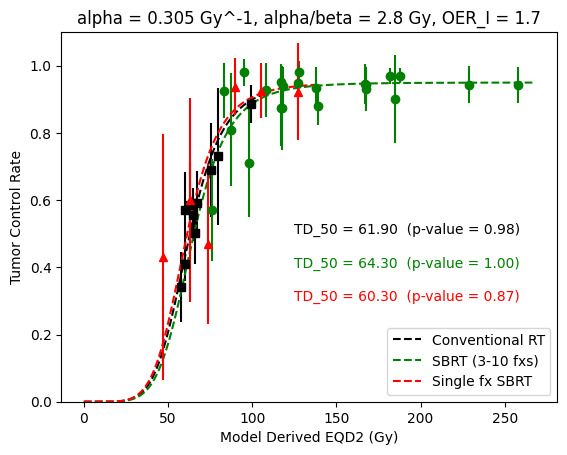

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import chi2_contingency, ttest_rel, spearmanr


tcp_upper_bound = 0.95
gamma_50 = 1.5
"""
    The following function takes arguments a, the tumour dose at which 50% TCP is expected, (TD_50) and x, the dose D. 
"""
def mdl(a, x):       
    return tcp_upper_bound / (1 + ((a / x) ** (gamma_50 * 4)))

fig = plt.figure()

for u in range(1,4):  #"u" can take the value of 1, 2 or 3 in this range of values, coresponding to the type of treatment specified as the first line of data in each cohort, i.e. 1=conv,2=SBRT,3=single fx 
    
    EQD2 = [] 
    TCP = []
    n_pt = []
    se = []
    v = 1

    """
        The EQD2, TCP and n_pt (number of patients) for each cohort was previously calculated and was assigned to different points of entry in the cohort structure.
        "se" is a calculation of the standard error of the TCP measurement for each cohort.
    """
    for w in range(len(cohort)):
        if cohort[w][0][0] == u:  
            EQD2.append(cohort[w][9][0])  
            TCP.append(cohort[w][5][0])
            n_pt.append(cohort[w][8][0])
            se.append(np.sqrt(TCP[v - 1] * (1 - TCP[v - 1]) / n_pt[v - 1]))
            v += 1
    
    EQD2 = np.array(EQD2)   #Converting list structure to array structure to proved element-wise operations. 
    TCP = np.array(TCP)
    n_pt = np.array(n_pt)
    
    Dose = EQD2.T    #Taking the transpose of the array of EQD2 and equaing it to the Dose
    Total = n_pt.T   #The transpose of the array containing the number of patients
    Cont = np.round(TCP.T * Total) #This line calculates the expected number of successful outcomes, which is often used in the context of a binomial distribution. 
    
    j = 0
    a_values = np.arange(0.1, 100.1, 0.1)   #Setting the range of values of TD_50

    """
        The following snippet of code performs the maximum likelihood estimation method on the range of a_values.  
        Calculation of the probability mass function for a binomial distriution is possible by using the "binom.pmf" function
        found in the "scipy.stats" library of Python, where "Cont" is the expected number of successful outcomes, "Total" is the number 
        of patients with local control in each cohort and p_exp is the expected nuumber of successes.
    """
    
    LogLikelihood = np.zeros(len(a_values))   
    LogLikelihood2 = np.zeros(len(a_values))
    P = np.zeros(len(Dose))     
    L_P = np.zeros(len(Dose))  
    LL = np.zeros(len(Dose))   
    
    for a in a_values:
        j += 1
        
        for i in range(len(EQD2)):
            dose = Dose[i]               
            p_obs = Cont[i] / Total[i]   #The observed probability
            p_exp = mdl(a, dose)         #The expected probability
            P[i] = binom.pmf(Cont[i], Total[i], p_exp) #probability mass function of the binomial distribution.
            L_P[i] = np.log(P[i])         #The natural log of P
            LL[i] = Total[i] * (p_obs * np.log(p_exp) + (1 - p_obs) * np.log(1 - p_exp))   #log-likelihood component based on the observed and expected probabilities.
        
        likelihood = np.prod(P)
        loglikelihood = np.sum(L_P)   #The sum of the natural log of the probabilities gives the overall log likelihood
        LogLikelihood[j-1] = loglikelihood   
        LogLikelihood2[j-1] = np.sum(LL)

    vector = LogLikelihood                            # vector stores the Log likelihood values
    maxVal = max(vector)                              # maxVal finds the maximum log likelihood values.
    pos_max = np.argmax(vector)                       # Finds and stores the index of the maximum value in the vector array. It gives you the position where the maximum log likelihood occurs.
    range1 = min(abs(vector - maxVal + 1.92))         # Calculates the minimum absolute difference between each value in the vector array and the quantity   
    pos_ran1 = np.argmin(abs(vector - maxVal + 1.92)) # Finds the index (position) where the minimum absolute difference occurs 
    vector[pos_max] = float('inf')                    # Set the element in the vector array at the position pos_max to positive infinity
    
    print(maxVal)
    
    range2 = min(abs(vector - maxVal + 1.92))           # Calculates the minimum absolute difference between each value in the modified vector and (maxVal + 1.92) and stores it in range2
    pos_ran2 = np.argmin(abs(vector - maxVal + 1.92))   # Finds the index where the minimum absolute difference occurs between the values in the modified vector and (maxVal + 1.92).
    nLL = maxVal / len(Dose)                            # This line calculates nLL, which is the normalized likelihood. It's the maximum log likelihood divided by the number of data points
    TD50 = pos_max / 10                                  
    
    rngs = [pos_ran1 / 10, pos_ran2 / 10]
    ahat = TD50

    ##

    observed = TCP * n_pt
    expected = mdl(ahat, EQD2) * n_pt
    bins = np.arange(1, len(observed) + 1)
    
    # Chi-squared goodness-of-fit test: It tests the goodness of fit between the "observed" and "expected" values.
    chi2, p, _, _ = chi2_contingency([observed, expected])
    
    
    # Paired t-test: determines whether there is a significant difference between the means of two related groups
    t_stat, p_t = ttest_rel(observed, expected)
    
    # Spearman correlation: Evaluates the strength and direction of monotonic relationships between variables.
    rho, pval = spearmanr(EQD2, TCP)
    
    print(ahat)   # The tumour dose at which 50% TCP is expected
    print(p)      # The p-value associated with the chi-squared test.
    print(p_t)    # The p-value associated with the t-test.
    
    """
        The following snippet of code plots the dose-response curves for each treatment type
    """
    
    xrange = np.arange(0, max(EQD2) + 10.01, 0.01)

    EQD2 = np.array(EQD2)
    TCP = np.array(TCP)
    se = np.array(se)
    
    if u == 1:
        plt.plot(xrange, mdl(ahat, xrange), 'k', linestyle='--', label = "Conventional RT")
        plt.errorbar(EQD2, TCP, 1.96 * se, fmt='sk')
        plt.text(125, 0.5, f'TD_50 = {ahat:.2f}  (p-value = {p:.2f})', color='k')
        plt.ylim(0, 1.1)
        plt.ylabel("Tumor Control Rate")
        plt.xlabel("Model Derived EQD2 (Gy)")
        
    if u == 2:
        plt.plot(xrange, mdl(ahat, xrange), 'g', linestyle='--', label = "SBRT (3-10 fxs)")
        plt.errorbar(EQD2, TCP, 1.96 * se, fmt='og')
        plt.text(125, 0.4, f'TD_50 = {ahat:.2f}  (p-value = {p:.2f})', color='g')
        plt.ylim(0, 1.1)
    
    if u == 3:
        plt.plot(xrange, mdl(ahat, xrange), 'r', linestyle='--', label = "Single fx SBRT")
        plt.errorbar(EQD2, TCP, 1.96 * se, fmt='^r')
        plt.text(125, 0.3, f'TD_50 = {ahat:.2f}  (p-value = {p:.2f})', color='r')
        plt.ylim(0, 1.1)
    
plt.legend(loc="lower right")
plt.title(f"alpha = {alpha_p_ori} Gy^-1, alpha/beta = {a_over_b} Gy, OER_I = {oer_i}")
plt.show()


## Maximum Log Likelihood Value

The following cell contains code which is based on the previous cell, but outputs the maximum log likelihood for the three types of treatments. This value will be plotted on a contour plot with the corresponding alpha, alpha/beta and OER_I values. 

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import chi2_contingency, ttest_rel, spearmanr


tcp_upper_bound = 0.95
gamma_50 = 1.5

def mdl(a, x):
    return tcp_upper_bound / (1 + ((a / x) ** (gamma_50 * 4)))

fig = plt.figure()

for u in range(1, 4):
    
    EQD2 = []
    TCP = []
    n_pt = []
    se = []
    v = 1

    for w in range(len(cohort)):
        if cohort[w][0][0]==1 or cohort[w][0][0] == 2 or cohort[w][0][0] == 3: 
            EQD2.append(cohort[w][9][0])
            TCP.append(cohort[w][5][0])
            n_pt.append(cohort[w][8][0])
            se.append(np.sqrt(TCP[v - 1] * (1 - TCP[v - 1]) / n_pt[v - 1]))
            v += 1

    EQD2 = np.array(EQD2)
    TCP = np.array(TCP)
    n_pt = np.array(n_pt)
    
    Dose = EQD2.T
    Total = n_pt.T
    Cont = np.round(TCP.T * Total)

    j = 0
    a_values = np.arange(0.1, 100.1, 0.1)
    
    LogLikelihood = np.zeros(len(a_values))
    LogLikelihood2 = np.zeros(len(a_values))
    P = np.zeros(len(Dose))
    L_P = np.zeros(len(Dose))
    LL = np.zeros(len(Dose))
    
    for a in a_values:
        j += 1
        
        for i in range(len(EQD2)):
            dose = Dose[i]
            p_obs = Cont[i] / Total[i]
            p_exp = mdl(a, dose)
            P[i] = binom.pmf(Cont[i], Total[i], p_exp)
            L_P[i] = np.log(P[i])
            LL[i] = Total[i] * (p_obs * np.log(p_exp) + (1 - p_obs) * np.log(1 - p_exp))
            
        likelihood = np.prod(P)
        loglikelihood = np.sum(L_P)
        LogLikelihood[j-1] = loglikelihood
        LogLikelihood2[j-1] = np.sum(LL)
        
    vector = LogLikelihood
    maxVal = max(vector)

print(maxVal)    


-98.10336913463381


<Figure size 640x480 with 0 Axes>

The plot produced by the subsequent cell shows the model curve and the observed data points for Tumor Control Rate as a function of Model Derived EQD2. It also includes information about the TD_50 value, its associated p-value, the Spearman correlation coefficient (r_s), and its p-value. The plot is a visual representation of the model's fit to the data and provides information about the correlation and significance of the model's parameters.

-98.10336913463381


/var/folders/x8/xgpszp797pg144khf96_wt_h0000gn/T/ipykernel_66637/3882191026.py:10: RuntimeWarning: divide by zero encountered in divide
  return tcp_upper_bound / (1 + ((a / x) ** (gamma_50 * 4)))


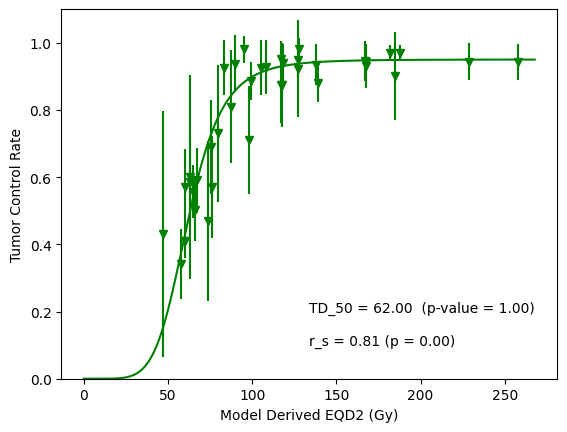

In [8]:
EQD2 = []
TCP = []
n_pt = []
se = []

v = 0
for w in range(len(cohort)):
    if cohort[w][0][0] == 1 or cohort[w][0][0] == 2 or cohort[w][0][0] == 3:
        EQD2.append(cohort[w][9][0])
        TCP.append(cohort[w][5][0])
        n_pt.append(cohort[w][8][0])
        se.append((TCP[v] * (1 - TCP[v]) / n_pt[v]) ** 0.5)
        v += 1


# Convert lists to NumPy arrays
EQD2 = np.array(EQD2)
TCP = np.array(TCP)
n_pt = np.array(n_pt)
se = np.array(se)

Dose = EQD2.T
Total = n_pt.T
Cont = np.round(TCP.T * Total)

j = 0
a_values = np.arange(0.1, 100.1, 0.1)
num_a_values = len(a_values)
LogLikelihood = np.zeros(num_a_values)
LogLikelihood2 = np.zeros(num_a_values)

for a in a_values:
    j += 1
    P = np.zeros(len(EQD2))
    L_P = np.zeros(len(EQD2))
    LL = np.zeros(len(EQD2))
    
    for i in range(len(EQD2)):
        dose = Dose[i]
        p_obs = Cont[i] / Total[i]
        p_exp = mdl(a, dose)
        
        P[i] = binom.pmf(Cont[i], Total[i], p_exp)
        L_P[i] = np.log(P[i])
        LL[i] = Total[i] * (p_obs * np.log(p_exp) + (1 - p_obs) * np.log(1 - p_exp))
    
    likelihood = np.prod(P)
    loglikelihood = np.sum(L_P)
    LogLikelihood[j - 1] = loglikelihood
    LogLikelihood2[j - 1] = np.sum(LL)

vector = LogLikelihood
maxVal = max(vector)
pos_max = np.argmax(vector)
range1 = min(np.abs(vector - maxVal + 1.92))
pos_ran1 = np.argmin(abs(vector - maxVal + 1.92))
vector[pos_max] = np.inf
range2 = min(np.abs(vector - maxVal + 1.92))
pos_ran2 = np.argmin(abs(vector - maxVal + 1.92))

nLL = maxVal / len(Dose)
TD50 = pos_max / 10
rnges = [pos_ran1 / 10, pos_ran2 / 10]

ahat = TD50

print(maxVal)

###

observed = TCP * n_pt
expected = mdl(ahat, EQD2) * n_pt
bins = np.arange(1, len(observed) + 1)

# Chi-squared goodness-of-fit test
chi2, p, _, _ = chi2_contingency([observed, expected])

# Paired t-test
t_stat, p_t = ttest_rel(observed, expected)

# Spearman correlation
rho, pval = spearmanr(EQD2, TCP)

xrange = np.arange(0, max(EQD2) + 10.01, 0.01)

plt.plot(xrange, mdl(ahat, xrange), 'g')
plt.errorbar(EQD2, TCP, 1.96 * se, fmt='vg')
plt.text(0.5 * max(xrange), 0.2, f'TD_50 = {ahat:.2f}  (p-value = {p:.2f})')
plt.text(0.5 * max(xrange), 0.1, f'r_s = {rho:.2f} (p = {pval:.2f})')
plt.ylim(0, 1.1)
plt.ylabel("Tumor Control Rate")
plt.xlabel("Model Derived EQD2 (Gy)")
plt.show()

-152.59487066560368


/var/folders/x8/xgpszp797pg144khf96_wt_h0000gn/T/ipykernel_66637/3882191026.py:10: RuntimeWarning: divide by zero encountered in divide
  return tcp_upper_bound / (1 + ((a / x) ** (gamma_50 * 4)))


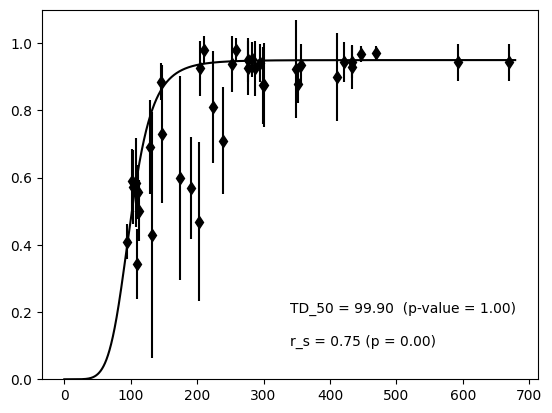

In [9]:
BED = []
TCP = []
n_pt = []
se = []

v = 0
for w in range(len(cohort)):
    if cohort[w][0][0] == 1 or cohort[w][0][0] == 2 or cohort[w][0][0] == 3:
        BED.append(cohort[w][11][0])
        TCP.append(cohort[w][5][0])
        n_pt.append(cohort[w][8][0])
        se.append((TCP[v] * (1 - TCP[v]) / n_pt[v]) ** 0.5)
        v += 1

# Convert lists to NumPy arrays
BED = np.array(BED)
TCP = np.array(TCP)
n_pt = np.array(n_pt)
se = np.array(se)

# Calculate Dose, Total, and Cont
Dose = BED.T
Total = n_pt.T
Cont = np.round(TCP.T * Total)

j = 0
a_values = np.arange(0.1, 100.1, 0.1)
num_a_values = len(a_values)
LogLikelihood = np.zeros(num_a_values)
LogLikelihood2 = np.zeros(num_a_values)

for a in a_values:
    j += 1
    P = np.zeros(len(EQD2))
    L_P = np.zeros(len(EQD2))
    LL = np.zeros(len(EQD2))
    
    for i in range(len(EQD2)):
        dose = Dose[i]
        p_obs = Cont[i] / Total[i]
        p_exp = mdl(a, dose)
        
        P[i] = binom.pmf(Cont[i], Total[i], p_exp)
        L_P[i] = np.log(P[i])
        LL[i] = Total[i] * (p_obs * np.log(p_exp) + (1 - p_obs) * np.log(1 - p_exp))
    
    likelihood = np.prod(P)
    loglikelihood = np.sum(L_P)
    LogLikelihood[j - 1] = loglikelihood
    LogLikelihood2[j - 1] = np.sum(LL)

vector = LogLikelihood
maxVal = max(vector)
pos_max = np.argmax(vector)
range1 = min(np.abs(vector - maxVal + 1.92))
pos_ran1 = np.argmin(abs(vector - maxVal + 1.92))
vector[pos_max] = np.inf
range2 = min(np.abs(vector - maxVal + 1.92))
pos_ran2 = np.argmin(abs(vector - maxVal + 1.92))

print(maxVal)

nLL = maxVal / len(Dose)
TD50 = pos_max / 10
rnges = [pos_ran1 / 10, pos_ran2 / 10]

ahat = TD50

observed = TCP * n_pt
expected = mdl(ahat, BED) * n_pt
bins = np.arange(1, len(observed) + 1)

chi2, p_bed, _, _ = chi2_contingency([observed, expected])

# Paired t-test
t_stat, p_bed_t = ttest_rel(observed, expected)

# Spearman correlation
rho, pval = spearmanr(BED, TCP)


xrange = np.arange(0, max(BED) + 10.01, 0.01)

# Plot the data with error bars and model
plt.errorbar(BED, TCP, 1.96 * se, fmt='dk')
plt.plot(xrange, mdl(ahat, xrange), 'k')

# Add text annotations
plt.text(0.5 * max(xrange), 0.2, f'TD_50 = {ahat:.2f}  (p-value = {p_bed:.2f})')
plt.text(0.5 * max(xrange), 0.1, f'r_s = {rho:.2f} (p = {pval:.2f})')

# Customize the plot
plt.ylim(0, 1.1)

# Show the plot (assuming you already have a figure created)
plt.show()

# Contour Plot to fit for Alpha and Beta Values

The data below was obtained manually by keeping the alpha value at 0.305Gy^-1, and changing the OER_I value between and the alpha/beta value. The contour plot probably needs more data points plotted. 

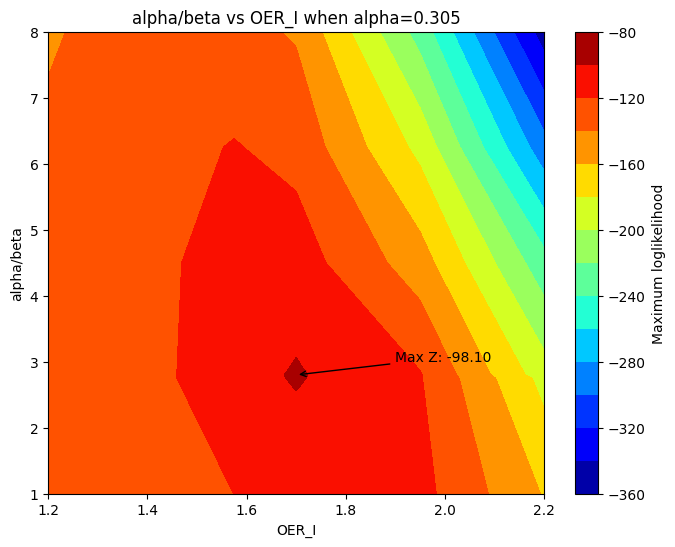

1.7


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import masked_where

# Data points
y = [1, 2.75, 2.8, 4.5, 6.25, 8] #1.875, 3.625,  5.375, 7.125
x = [1.2, 1.45, 1.575, 1.7, 1.95, 2.2]
data = [
    (1, 1.2, -137.1958686612035),
    (1, 1.45, -131.7934895365754),
    (1, 1.575, -119.88568340427967),
    (1, 1.7, -113.19106629745473),
    (1, 1.95, -113.81329881216486),
    (1, 2.2, -161.40479661342297),
    (2.75, 1.2, -135.9367211666191),
    (2.75, 1.45, -120.93951768882827),
    (2.75, 1.575, -108.25954956463889),
    (2.75, 1.7, -98.35219428852476),
    (2.75, 1.95, -118.67793462927978),
    (2.75, 2.2, -186.47863663903925),
    (2.8, 1.2, -135.97186013148234),
    (2.8, 1.45, -120.95611478422616),
    (2.8, 1.575, -108.00208214842641),
    (2.8, 1.7, -98.10336913463381),
    (2.8, 1.95, -118.74825751067343),
    (2.8, 2.2, -190.9543931731627),
    (4.5, 1.2, -138.43786012528392),
    (4.5, 1.45, -121.39236508553255),
    (4.5, 1.575, -112.2767561145915),
    (4.5, 1.7, -110.31027481186655),
    (4.5, 1.95, -150.68187901120464),
    (4.5, 2.2, -232.36351036361185),
    (6.25, 1.2, -137.78220536977577),
    (6.25, 1.45, -125.17059536520573),
    (6.25, 1.575, -118.90293469591502),
    (6.25, 1.7, -125.977974904504),
    (6.25, 1.95, -185.68861591419397),
    (6.25, 2.2, -292.20689419678456),
    (8, 1.2, -141.407416046491),
    (8, 1.45, -131.3448370028925),
    (8, 1.575, -133.21814153397327),
    (8, 1.7, -142.14905847402633),
    (8, 1.95, -227.9347117970044),
    (8, 2.2, -349.8575396940779),
    
]

# Extract x, y, and z values
y_values = [point[0] for point in data]
x_values = [point[1] for point in data]
z_values = [point[2] for point in data]

# Create a grid of x and y values
x_grid, y_grid = np.meshgrid(x, y)

# Reshape z_values to match the grid dimensions
z_grid = np.reshape(z_values, (len(y), len(x)))

# Create a contour plot with a color map
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=15, cmap='jet')

# Add a color bar legend
cbar = plt.colorbar(contour)
cbar.set_label('Maximum loglikelihood')

# Find the maximum Z value
max_z = max(z_values)


# Label the maximum Z value
max_x = x_values[z_values.index(max_z)]
max_y = y_values[z_values.index(max_z)]
plt.annotate(f'Max Z: {max_z:.2f}', xy=(max_x, max_y), xytext=(max_x + 0.2, max_y + 0.2),
             arrowprops=dict(arrowstyle='->'))

# Add labels
plt.xlabel('OER_I')
plt.ylabel('alpha/beta')
plt.title('alpha/beta vs OER_I when alpha=0.305')

# Show the plot
plt.show()


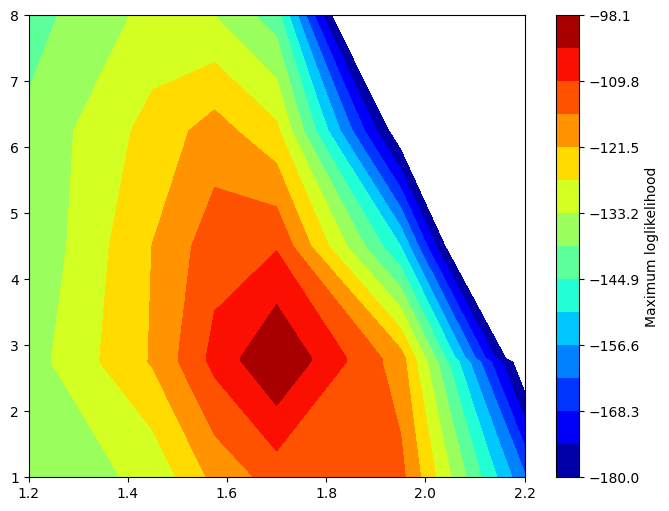

In [28]:
# Create custom contour levels with a level at -180
custom_levels = np.linspace(-180, max_z, 15)  # Adjust the number of levels as needed


# Create a contour plot with a custom color map
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=custom_levels, cmap='jet')

# Define a threshold
threshold = -180

# Create a masked array to mask values below the threshold
z_masked = masked_where(z_grid < threshold, z_grid)

# Add a color bar legend
cbar = plt.colorbar(contour)
cbar.set_label('Maximum loglikelihood')




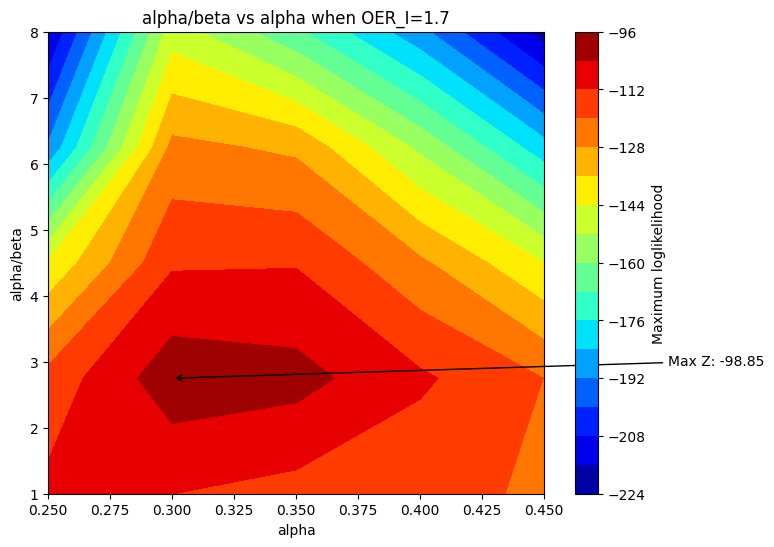

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
y =  [1, 2.75, 4.5, 6.25, 8]
x = [0.25, 0.3, 0.35, 0.4, 0.45]
data = [
    (1, 0.25, -109.97115191805628),
    (1, 0.3, -111.96844170436248), 
    (1, 0.35, -114.85469978926533),
    (1, 0.4, -118.08520014121868),
    (1, 0.45, -120.88568609993021),
    (2.75, 0.25, -117.16547596222998),
    (2.75, 0.3, -98.84598858968081),
    (2.75, 0.35, -101.04226545119815),
    (2.75, 0.4, -110.64924820307021),
    (2.75, 0.45, -120.07820261153924),
    (4.5, 0.25, -143.08685247449384),
    (4.5, 0.3, -113.05114321178395),
    (4.5, 0.35, -112.55527027744583),
    (4.5, 0.4, -126.5302259529461),
    (4.5, 0.45, -144.00634717487185),
    (6.25, 0.25, -190.9781260540733),
    (6.25, 0.3, -125.7876519196735),
    (6.25, 0.35, -129.62229485274656),
    (6.25, 0.4, -153.79448330188035),
    (6.25, 0.45, -180.8550987742612),
    (8, 0.25, -216.3317517395461),
    (8, 0.3, -148.00838424846827),
    (8, 0.35, -166.30029855382944),
    (8, 0.4, -189.58806421681965),
    (8, 0.45, -219.91587068679496),
    
]

# Extract x, y, and z values
y_values = [point[0] for point in data]
x_values = [point[1] for point in data]
z_values = [point[2] for point in data]

# Create a grid of x and y values
x_grid, y_grid = np.meshgrid(x, y)

# Reshape z_values to match the grid dimensions
z_grid = np.reshape(z_values, (len(y), len(x)))

# Create a contour plot with a color map
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=15, cmap='jet')

# Add a color bar legend
cbar = plt.colorbar(contour)
cbar.set_label('Maximum loglikelihood')

# Find the maximum Z value
max_z = max(z_values)

# Label the maximum Z value
max_x = x_values[z_values.index(max_z)]
max_y = y_values[z_values.index(max_z)]
plt.annotate(f'Max Z: {max_z:.2f}', xy=(max_x, max_y), xytext=(max_x + 0.2, max_y + 0.2),
             arrowprops=dict(arrowstyle='->'))

# Add labels
plt.xlabel('alpha')
plt.ylabel('alpha/beta')
plt.title('alpha/beta vs alpha when OER_I=1.7')

# Show the plot
plt.show()


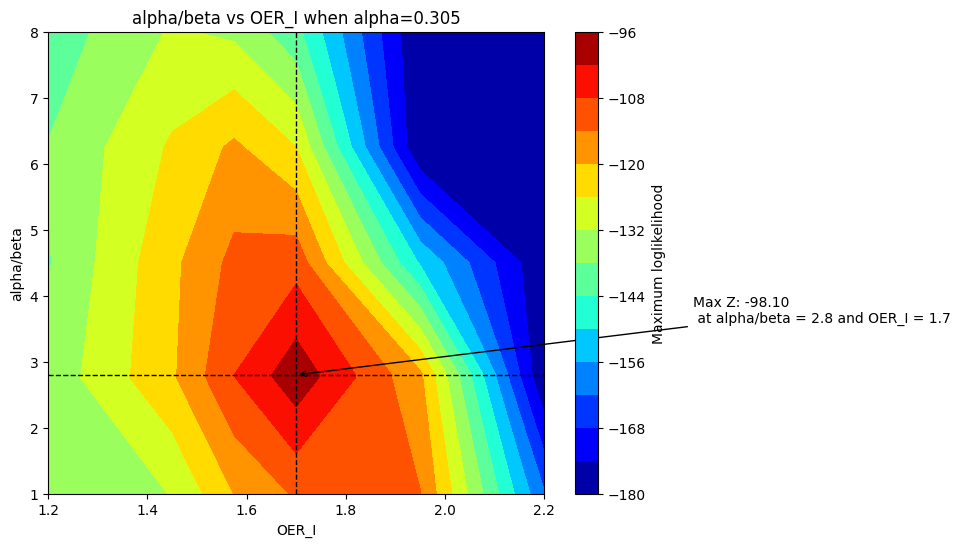

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import masked_where

# Data points
y = [1, 2.75, 2.8, 4.5, 6.25, 8] #1.875, 3.625,  5.375, 7.125
x = [1.2, 1.45, 1.575, 1.7, 1.95, 2.2]
data = [
    (1, 1.2, -137.1958686612035),
    (1, 1.45, -131.7934895365754),
    (1, 1.575, -119.88568340427967),
    (1, 1.7, -113.19106629745473),
    (1, 1.95, -113.81329881216486),
    (1, 2.2, -161.40479661342297),
    (2.75, 1.2, -135.9367211666191),
    (2.75, 1.45, -120.93951768882827),
    (2.75, 1.575, -108.25954956463889),
    (2.75, 1.7, -98.35219428852476),
    (2.75, 1.95, -118.67793462927978),
    (2.75, 2.2, -179.47863663903925),
    (2.8, 1.2, -135.97186013148234),
    (2.8, 1.45, -120.95611478422616),
    (2.8, 1.575, -108.00208214842641),
    (2.8, 1.7, -98.10336913463381),
    (2.8, 1.95, -118.74825751067343),
    (2.8, 2.2, -179.9543931731627),
    (4.5, 1.2, -138.43786012528392),
    (4.5, 1.45, -121.39236508553255),
    (4.5, 1.575, -112.2767561145915),
    (4.5, 1.7, -110.31027481186655),
    (4.5, 1.95, -150.68187901120464),
    (4.5, 2.2, -179.36351036361185),
    (6.25, 1.2, -137.78220536977577),
    (6.25, 1.45, -125.17059536520573),
    (6.25, 1.575, -118.90293469591502),
    (6.25, 1.7, -125.977974904504),
    (6.25, 1.95, -179.68861591419397),
    (6.25, 2.2, -179.20689419678456),
    (8, 1.2, -141.407416046491),
    (8, 1.45, -131.3448370028925),
    (8, 1.575, -133.21814153397327),
    (8, 1.7, -142.14905847402633),
    (8, 1.95, -179.9347117970044),
    (8, 2.2, -179.8575396940779),
    
]

# Extract x, y, and z values
y_values = [point[0] for point in data]
x_values = [point[1] for point in data]
z_values = [point[2] for point in data]

# Create a grid of x and y values
x_grid, y_grid = np.meshgrid(x, y)

# Reshape z_values to match the grid dimensions
z_grid = np.reshape(z_values, (len(y), len(x)))

# Create a contour plot with a color map
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=15, cmap='jet')

# Add a color bar legend
cbar = plt.colorbar(contour)
cbar.set_label('Maximum loglikelihood')

# Find the maximum Z value
max_z = max(z_values)


# Label the maximum Z value
max_x = x_values[z_values.index(max_z)]
max_y = y_values[z_values.index(max_z)]
plt.annotate(f'Max Z: {max_z:.2f} \n at alpha/beta = {max_y} and OER_I = {max_x}', xy=(max_x, max_y), xytext=(max_x + 0.8, max_y + 0.8),
             arrowprops=dict(arrowstyle='->'))

# Add vertical and horizontal lines (crosshairs) through the maximum point
plt.axvline(x=max_x, color='k', linestyle='--', linewidth=1)
plt.axhline(y=max_y, color='k', linestyle='--', linewidth=1)

# Add labels
plt.xlabel('OER_I')
plt.ylabel('alpha/beta')
plt.title('alpha/beta vs OER_I when alpha=0.305')

# Show the plot
plt.show()


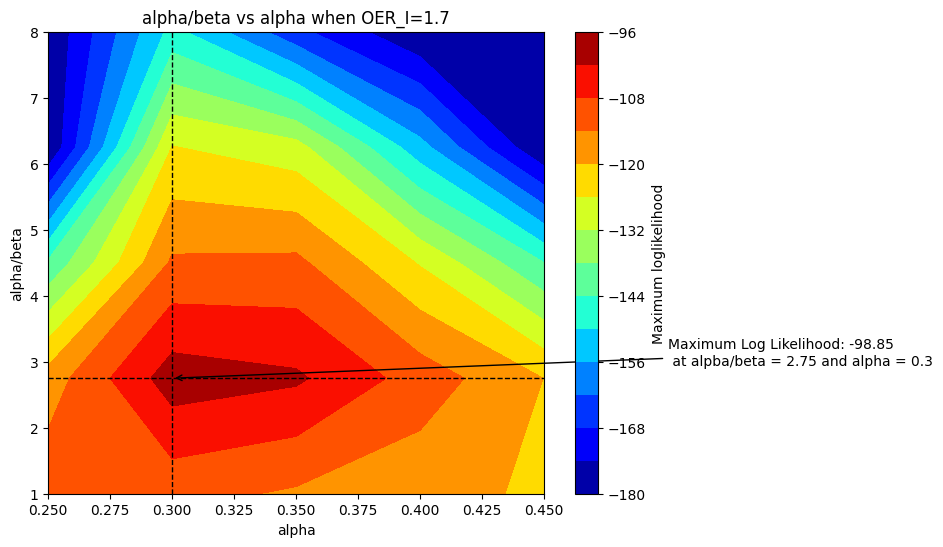

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
y =  [1, 2.75, 4.5, 6.25, 8]
x = [0.25, 0.3, 0.35, 0.4, 0.45]
data = [
    (1, 0.25, -109.97115191805628),
    (1, 0.3, -111.96844170436248), 
    (1, 0.35, -114.85469978926533),
    (1, 0.4, -118.08520014121868),
    (1, 0.45, -120.88568609993021),
    (2.75, 0.25, -117.16547596222998),
    (2.75, 0.3, -98.84598858968081),
    (2.75, 0.35, -101.04226545119815),
    (2.75, 0.4, -110.64924820307021),
    (2.75, 0.45, -120.07820261153924),
    (4.5, 0.25, -143.08685247449384),
    (4.5, 0.3, -113.05114321178395),
    (4.5, 0.35, -112.55527027744583),
    (4.5, 0.4, -126.5302259529461),
    (4.5, 0.45, -144.00634717487185),
    (6.25, 0.25, -179.9781260540733),
    (6.25, 0.3, -125.7876519196735),
    (6.25, 0.35, -129.62229485274656),
    (6.25, 0.4, -153.79448330188035),
    (6.25, 0.45, -179.8550987742612),
    (8, 0.25, -179.3317517395461),
    (8, 0.3, -148.00838424846827),
    (8, 0.35, -166.30029855382944),
    (8, 0.4, -179.58806421681965),
    (8, 0.45, -179.91587068679496),
    
]

# Extract x, y, and z values
y_values = [point[0] for point in data]
x_values = [point[1] for point in data]
z_values = [point[2] for point in data]

# Create a grid of x and y values
x_grid, y_grid = np.meshgrid(x, y)

# Reshape z_values to match the grid dimensions
z_grid = np.reshape(z_values, (len(y), len(x)))

# Create a contour plot with a color map
plt.figure(figsize=(8, 6))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=15, cmap='jet')

# Add a color bar legend
cbar = plt.colorbar(contour)
cbar.set_label('Maximum loglikelihood')

# Find the maximum Z value
max_z = max(z_values)

# Label the maximum Z value
max_x = x_values[z_values.index(max_z)]
max_y = y_values[z_values.index(max_z)]
plt.annotate(f'Maximum Log Likelihood: {max_z:.2f} \n at alpba/beta = {max_y} and alpha = {max_x}', xy=(max_x, max_y), xytext=(max_x + 0.2, max_y + 0.2),
             arrowprops=dict(arrowstyle='->'))

# Add vertical and horizontal lines (crosshairs) through the maximum point
plt.axvline(x=max_x, color='k', linestyle='--', linewidth=1)
plt.axhline(y=max_y, color='k', linestyle='--', linewidth=1)


# Add labels
plt.xlabel('alpha')
plt.ylabel('alpha/beta')
plt.title('alpha/beta vs alpha when OER_I=1.7')

# Show the plot
plt.show()

